# RNN-LSTM Model
### pub ver 2


In [2]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

import mglearn
#import t_Mod
from t_Mod import *

#from t_Mod.plots_t import *

In [3]:
df = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "constant0(del).csv") )
#df2 = pd.read_csv(
#    os.path.join(mglearn.datasets.DATA_PATH, "constant(val).csv") )
# 예제를 위해 몇개의 열만 선택합니다
#df = df[['IR', 'FlowHt', 'Const', 'Var', 'Base', 'MixS75','MixS50','MixS25']]
#df = df[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
df = df[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
#df2 = df2[['IR', 'FlowHt', 'Sand','Ash']]
df['delIF'] = df['delFlow']/df['delIR']*-1

df['delIF']=df['delIF'].replace(np.nan, 0)
df = df[['IR', 'FlowHt', 'Sand','Ash','delIR' ]]

display(df.head())
#display(df2.head())

,IR,FlowHt,Sand,Ash,delIR
0,1.0000,0.0000,1.0,0.0,0.0000
1,0.9995,0.1798,1.0,0.0,-0.0005
2,0.9985,0.5389,1.0,0.0,-0.0010
3,0.9970,1.0757,1.0,0.0,-0.0015
4,0.9950,1.7884,1.0,0.0,-0.0020


(1.041325, 0.0)

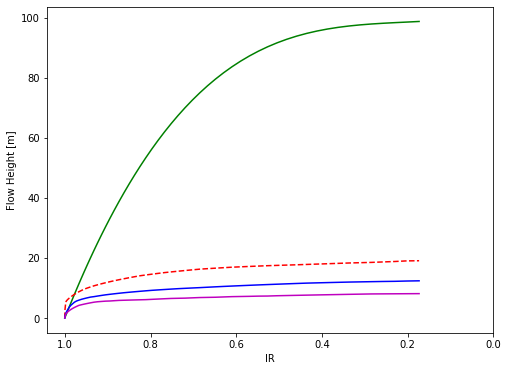

In [4]:

plt.plot(df.iloc[0:58,0], df.iloc[0:58,1], 'g-'
         , df.iloc[58:116,0], df.iloc[58:116,1],'r--'
         ,df.iloc[116:174,0], df.iloc[116:174,1],'b-'
         ,df.iloc[174:232,0], df.iloc[174:232,1], 'm-')
plt.xlabel('IR')
plt.ylabel('Flow Height [m]')
#plt.axis('equal')
#plt.axis('square')
plt.xlim([plt.xlim()[1], 0])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([-100, 100], [-100, 100])


In [5]:
# ## 데이터 정규화

num_features = df.shape[1]
num_features

5

In [6]:
#df['FlowHt']=(df['FlowHt']-df['FlowHt'].mean())/df['FlowHt'].std()


df.describe()

,IR,FlowHt,Sand,Ash,delIR
count,464.000000,464.000000,464.000000,464.000000,464.000000
mean,0.719750,18.216106,0.562500,0.437500,-0.014250
std,0.250962,23.804094,0.292666,0.292666,0.008379
min,0.173500,0.000000,0.100000,0.000000,-0.028500
25%,0.527000,5.900000,0.362500,0.212500,-0.021500
50%,0.789750,8.882400,0.550000,0.450000,-0.014250
75%,0.947500,15.364700,0.787500,0.637500,-0.007000
max,1.000000,98.685300,1.000000,0.900000,0.000000


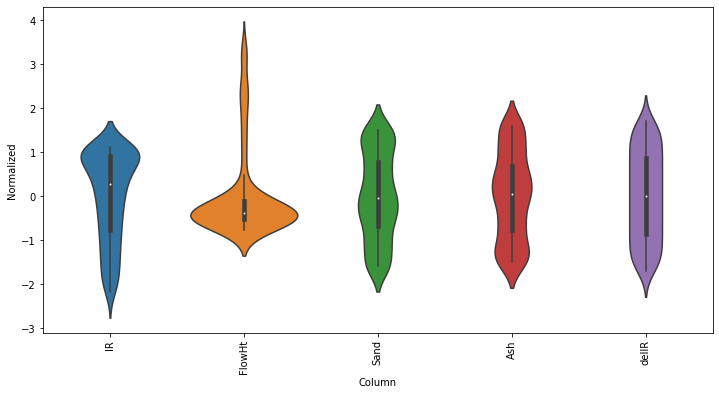

In [7]:
df_mean = df.mean()
df_std = df.std()
df_std_s = (df - df_mean) / df_std
df_std_m = df_std_s.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std_m)
_ = ax.set_xticklabels(df.keys(), rotation=90)
df_std_s.describe()
plt.show()

In [8]:
df_std_s.describe()

,IR,FlowHt,Sand,Ash,delIR
count,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02,4.640000e+02
mean,8.958351e-16,5.206563e-16,1.025999e-15,-4.594026e-17,-1.171477e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.176627e+00,-7.652509e-01,-1.580300e+00,-1.494878e+00,-1.700605e+00
25%,-7.680453e-01,-5.173944e-01,-6.833730e-01,-7.687946e-01,-8.652203e-01
50%,2.789270e-01,-3.921051e-01,-4.271081e-02,4.271081e-02,-1.242062e-15
75%,9.075088e-01,-1.197864e-01,7.687946e-01,6.833730e-01,8.652203e-01
max,1.116704e+00,3.380477e+00,1.494878e+00,1.580300e+00,1.700605e+00


#### determined not to applied the normalization

In [7]:
# data
df_org = df
#df = df_std_s

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)*0.5

curve_0 = df[0:int(n*0.25)].copy()
curve_1 = df[int(n*0.25):int(n*0.5)].copy()
curve_2 = df[int(n*0.5):int(n*0.75)].copy()
curve_3 = df[int(n*0.75):int(n)].copy()
curve_4 = df[int(n):].copy()
#train_df_s = train_df_s.reset_index(drop=True)

In [8]:
df.describe()
#print(df[58:116])

,IR,FlowHt,Sand,Ash,delIR
count,464.000000,464.000000,464.000000,464.000000,464.000000
mean,0.719750,18.216106,0.562500,0.437500,-0.014250
std,0.250962,23.804094,0.292666,0.292666,0.008379
min,0.173500,0.000000,0.100000,0.000000,-0.028500
25%,0.527000,5.900000,0.362500,0.212500,-0.021500
50%,0.789750,8.882400,0.550000,0.450000,-0.014250
75%,0.947500,15.364700,0.787500,0.637500,-0.007000
max,1.000000,98.685300,1.000000,0.900000,0.000000


Text(0, 0.5, 'Flow Height [m]')

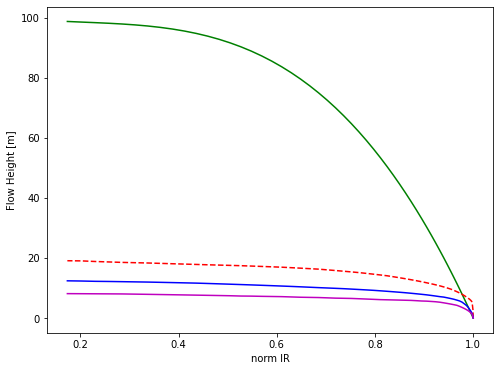

In [9]:

plt.plot(df.iloc[0:58,0], df.iloc[0:58,1], 'g-'
         , df.iloc[58:116,0], df.iloc[58:116,1],'r--'
         ,df.iloc[116:174,0], df.iloc[116:174,1],'b-'
         ,df.iloc[174:232,0], df.iloc[174:232,1], 'm-')
plt.xlabel('norm IR')
plt.ylabel('Flow Height [m]')
#plt.axis('equal')
#plt.axis('square')
#plt.xlim([plt.xlim()[1], -2.5])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([-100, 100], [-100, 100])


## for publish

#  curve_0


#### use plot_curve2

In [10]:
crv_0 = curve_0.copy()
crv_0 = crv_0.reset_index(drop=True)
#m1 = int(n*0.2)
m1 = int(len(curve_0))
#
m = m1*1.0
train_df_00 = crv_0[0:int(m*0.8)]
val_df_00 = crv_0[int(m*0.8):int(m*1.0)]
test_df_00 = crv_0[int(m*0.8):int(m)]

for i in range(2, 4):
#    m = m1*0.33334*i
    if i == 2 : m = m1*0.9
    if i == 3 : m = m1*1.0
    train_df_0 = crv_0[0:int(m*0.6)]
    val_df_0 = crv_0[int(m*0.6):int(m*0.8)]
    test_df_0 = crv_0[int(m*0.8):int(m)]
    exec(f'train_df_0{i-1} = train_df_0')
    exec(f'val_df_0{i-1} = val_df_0')
    exec(f'test_df_0{i-1} = test_df_0')


In [11]:
train_total = [train_df_00, train_df_01, train_df_02]
val_total = [val_df_00, val_df_01, val_df_02]
test_total = [test_df_00, test_df_01, test_df_02]

ttt = { 'tr' : train_total, 'va' : val_total, 'te' : test_total}
#ttt = { 'tr' : train_total, 'va' : val_total, 'te' : val_total}
ttt = pd.DataFrame(ttt)
print(ttt.columns)
print(ttt.index)

Index(['tr', 'va', 'te'], dtype='object')
RangeIndex(start=0, stop=3, step=1)


(0.0, 105.0)

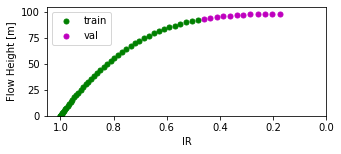

In [12]:
def plot_curve2(trg=None, valg=None, teg=None):
    if(trg is not None) : plt.plot(trg['IR'], trg['FlowHt'], 'go', label='train', markersize=5, zorder=1)
    if(valg is not None) : plt.plot(valg['IR'], valg['FlowHt'], 'mo', label='val',  markersize=5, zorder=1)
    if(teg is not None) : plt.plot(teg['IR'], teg['FlowHt'], 'ro', label='test',  markersize=5, zorder=1)
    plt.xlabel('IR')
    plt.ylabel('Flow Height [m]')
    #plt.xlim([plt.xlim()[1], plt.xlim()[0]])
    plt.legend(loc='best')
    plt.gca().invert_xaxis()
   # plt.gca().invert_yaxis()
#from t_Mod.plots_t import plot_curve, eval, add_curve # absolute path, import 함수

for i in range(0, 1) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt.iloc[i]['tr']
        va = ttt.iloc[i]['va']
        te = ttt.iloc[i]['te']
    #    plot_curve2(trg = tr, valg = va)
        plot_curve2( tr,  va)
   #     plots_t.plot_curve(tr, va, va)
#        t_Mod.plots_t.plot_curve(tr, va, te)
plt.gca().set_xlim(1.05, 0)
plt.gca().set_ylim(0, 105)



# curve 1

In [13]:
crv_1 = curve_1.copy()
m1 = int(len(crv_1))
m = m1*1.0
train_df_10 = crv_1[0:int(m*0.8)]
val_df_10 = crv_1[int(m*0.8):int(m*1.0)]
test_df_10 = crv_1[int(m*0.8):int(m)]

for i in range(2, 4):
    m = m1*0.33334*i
    train_df_1 = crv_1[0:int(m*0.6)]
    val_df_1 = crv_1[int(m*0.6):int(m*0.8)]
    test_df_1 = crv_1[int(m*0.8):int(m)]
    exec(f'train_df_1{i-1} = train_df_1')
    exec(f'val_df_1{i-1} = val_df_1')
    exec(f'test_df_1{i-1} = test_df_1')

train_t_1 = {0: train_df_10 , 1: train_df_11, 2: train_df_12 }
val_t_1 = {0: val_df_10 , 1: val_df_11, 2: val_df_12 }
test_t_1 = {0: test_df_10 , 1: test_df_11, 2: test_df_12 }

ttt_1 = { 'tr' : train_t_1, 'va' : val_t_1, 'te' : test_t_1}
ttt_1 = pd.DataFrame(ttt_1)

(0.0, 25.0)

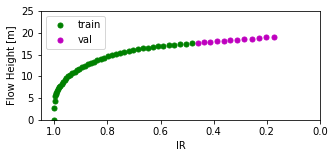

In [14]:
for i in range(0, 1) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_1.iloc[i]['tr']
        va = ttt_1.iloc[i]['va']
        te = ttt_1.iloc[i]['te']
        plot_curve2( tr, va )
plt.gca().set_xlim(1.05, 0)
plt.gca().set_ylim(0, 25)

# curve_2  -----
#### test set 100%, use train as test

In [15]:
crv_2 = curve_2.copy()
m1 = int(len(crv_2))
m = m1*1.0
train_df_20 = crv_2[0:int(m*1.0)]
val_df_20 = crv_2[int(m*0.8):int(m*1.0)]
test_df_20 = crv_2[int(m*0.0):int(m)]

for i in range(2, 4):
    m = m1*0.33334*i
    train_df_2 = crv_2[0:int(m*0.6)]
    val_df_2 = crv_2[int(m*0.6):int(m*0.8)]
    test_df_2 = crv_2[int(m*0.8):int(m)]
    exec(f'train_df_2{i-1} = train_df_2')
    exec(f'val_df_2{i-1} = val_df_2')
    exec(f'test_df_2{i-1} = test_df_2')

train_t_2 = {0: train_df_20 , 1: train_df_21, 2: train_df_22 }
val_t_2 = {0: val_df_20 , 1: val_df_21, 2: val_df_22 }
test_t_2 = {0: test_df_20 , 1: test_df_21, 2: test_df_22 }

ttt_2 = { 'tr' : train_t_2, 'va' : val_t_2, 'te' : test_t_2}
ttt_2 = pd.DataFrame(ttt_2)

(0.0, 15.0)

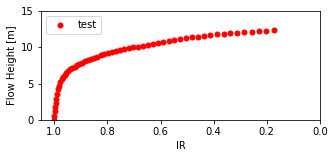

In [16]:
for i in range(0, 1) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_2.iloc[i]['tr']
        va = ttt_2.iloc[i]['va']
        te = ttt_2.iloc[i]['te']
        plot_curve2(teg = te)
plt.gca().set_xlim(1.05, 0)
plt.gca().set_ylim(0, 15)

# curve 3

In [17]:
crv_3 = curve_3.copy()
m1 = int(len(crv_3))
m = m1*1.0
train_df_30 = crv_3[0:int(m*0.8)]
val_df_30 = crv_3[int(m*0.8):int(m*1.0)]
test_df_30 = crv_3[int(m*0.8):int(m)]

for i in range(2, 4):
    m = m1*0.33334*i
    train_df_3 = crv_3[0:int(m*0.8)]
    val_df_3 = crv_3[int(m*0.6):int(m*0.8)]
    test_df_3 = crv_3[int(m*0.8):int(m)]
    exec(f'train_df_3{i-1} = train_df_3')
    exec(f'val_df_3{i-1} = val_df_3')
    exec(f'test_df_3{i-1} = test_df_3')

train_t_3 = {0: train_df_30 , 1: train_df_31, 2: train_df_32 }
val_t_3 = {0: val_df_30 , 1: val_df_31, 2: val_df_32 }
test_t_3 = {0: test_df_30 , 1: test_df_31, 2: test_df_32 }

ttt_3 = { 'tr' : train_t_3, 'va' : val_t_3, 'te' : test_t_3}
ttt_3 = pd.DataFrame(ttt_3)

(0.0, 12.0)

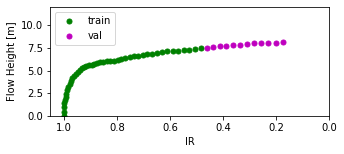

In [18]:
for i in range(0, 1) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_3.iloc[i]['tr']
        va = ttt_3.iloc[i]['va']
        te = ttt_3.iloc[i]['te']
        plot_curve2(tr, va)
plt.gca().set_xlim(1.05, 0)
plt.gca().set_ylim(0, 12)


#### WindowGrerator Class
#### WinGen()

In [19]:
# WindowGen needs train_df
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
train_df = train_df_01.copy()
val_df = val_df_01.copy()
test_df = val_df_01.copy()


In [20]:
single_step_window = Class_t.WindowGenerator(
    input_width=1, label_width=1, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['FlowHt']

In [21]:
single_step_window_t = Class_t.WinGen(
    input_width=1, label_width=1, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])
single_step_window_t


Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['FlowHt']

In [22]:
CONV_WIDTH = 3
conv_window = Class_t.WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv_window

conv_window_t = Class_t.WinGen(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv_window_t

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['FlowHt']

In [23]:
wide_window = Class_t.WindowGenerator(
    input_width=8, label_width=8, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_window
#print(wide_window)
wide_window_t = Class_t.WinGen(
    input_width=8, label_width=8, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_window_t

Total window size: 9
Input indices: [0 1 2 3 4 5 6 7]
Label indices: [1 2 3 4 5 6 7 8]
Label column name(s): ['FlowHt']

In [24]:
LABEL_WIDTH = 8
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = Class_t.WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

In [25]:
wide_conv_window_t = Class_t.WinGen(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window_t



Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

In [26]:
crv_4 = curve_4.copy()
m = len(crv_4)
train_df_41 = crv_4[116:174]  #10% 90%
train_df_42 = crv_4[0:58]  #40% 60%
train_df_43 = crv_4[58:116]  #60% 40%
train_df_4 = crv_4[174:]  #90% 10%
train_df_45 = crv_4[:]  #all


#  Recurrent Neural Network(RNN)


# functions

In [27]:
tr_loss_con = []
va_loss_con= []
tr_mae_con = []
va_mae_con = []


In [28]:
def add_curve1(curve=None, window = None, window_t=None,
              model=None, npat= 2, num_epoch = 20, add_num=0,  df_name=None ) :

    train_loss = []
    val_loss = []
    train_mae = []
    val_mae = []

    #for i in range(0,(3-add_num)) :
    for i in range(0, 3):
        MAX_EPOCHS = num_epoch + 10*i
#        MAX_EPOCHS = 20 + 10*i
        train_df = curve.iloc[i]['tr']
        val_df = curve.iloc[i]['va']
        #val_df = curve.iloc[i]['tr']
        test_df = curve.iloc[i]['te']

        window.train_df = train_df
        window.val_df = val_df
        window.test_df = test_df

       # if i >= add_num :
        if i == add_num :
            hist =  fit_3(model, window, patience= npat, EPOCHS = MAX_EPOCHS )

            train_loss += hist.history['loss'][-1:]
            if 'val_loss' not in hist.history:
                print("val_loss not in the list")
            else : val_loss += hist.history['val_loss'][-1:]

            train_mae += hist.history['mean_absolute_error'][-1:]
            if 'val_mean_absolute_error' not in hist.history:
                print("val_mean_absolute_error not in the list")
            else : val_mae += hist.history['val_mean_absolute_error'][-1:]
            #IPython.display.clear_output()

            eval1(hist)

            window_t.train_df = train_df
            window_t.val_df = val_df
            window_t.test_df = test_df

            #window_t.plot_batch(model, dset_name='train', n_batch=10 )
            plot_xy1(model, window, window_t, n_batch=30)

            subplot_title = (df_name+str(i))
            plt.gca().set_title(subplot_title)

            #plt.text(0.9, 0.1, "subtitle".format(subplot_title))
            #plt.gca().text(0.9, 0.1,  subplot_title)


    #    window_t.plot_batch(model, dset_name='val', n_batch=10, figures=0)

#    window_t.plot_batch(model, dset_name='test', n_batch=10, figures=0)

    train_loss = [x/4 for x in train_loss]
    val_loss = [x/4 for x in val_loss]
    train_mae = [x/4 for x in train_mae]
    val_mae = [x/4 for x in val_mae]

    return train_loss, val_loss, train_mae, val_mae, hist

def fit_3(model, window,   patience=2, EPOCHS=None):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
    history = model.fit(window.train, epochs=EPOCHS,
                      validation_data=window.val, verbose=0
                     , callbacks=[early_stopping])
    return history

def eval1(hist) :
    fig, loss_ax = plt.subplots(figsize =(7,3))

    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    if 'val_loss' in hist.history:
        loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['mean_absolute_error'], 'b', label='train MAE')
    if 'val_mean_absolute_error' in hist.history:
        acc_ax.plot(hist.history['val_mean_absolute_error'], 'g', label='val MAE')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('mean_absolute_error')

    loss_ax.legend(loc='lower left')
    acc_ax.legend(loc='upper right')
    #loss_ax.legend(loc='center')
    #acc_ax.legend(loc='lower center')


def plot_xy1(model=None, window=None, window_t=None, dset_name=None, plot_col='FlowHt', max_subplots=40,
             n_batch=None, figures=None):
  if dset_name is not None :
      if dset_name == 'train':
            dataset = window_t.train
      elif dset_name == 'val':
            dataset = window_t.val
      elif dset_name == 'test' :
            dataset = window_t.test
#      else :
#            dataset = self.train

  if model is not None :
        fig, ax2 = plt.subplots(figsize =(4,2))
        ax2.margins(0.01)

  fig, ax3 = plt.subplots(figsize =(3,3))
  ax3.margins(0.01)

  markers = ["o", "s", "D", "h"]
  colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

  if dset_name is not None :
      data = [dataset]
  else :
      data = [window_t.train ]
  for j, dataset in enumerate(data) :
      for i, batch in enumerate(dataset) :
            inputs, labels, lab = batch
#            nrows = len(inputs)
#            if nrows == 1 :nrows=2
            if  j == 0 and i == 0 :
              x_max_0 = np.array([tf.reduce_max(labels)])
              x_min_0 = np.array([tf.reduce_min(labels)])

            x_max_tmp = np.array([tf.reduce_max(labels)])
            x_min_tmp = np.array([tf.reduce_min(labels)])
            if x_max_0 <= x_max_tmp:
                x_max = x_max_tmp
                x_max_0 = x_max_tmp
            if x_min_0 >= x_min_tmp:
                x_min = x_min_tmp
                x_min_0 = x_min_tmp

            if model is not None:
                batnum = len(inputs)
                predictions = model(inputs)

                predict0 = predictions.numpy()
                predict1 =  np.concatenate((predict0.T), axis=0)

                predict = np.zeros([batnum+7, batnum]) #batch+window-shift, batch
                for ii in range(batnum) :
                    predict[ii:8+ii, ii] = predict1[0:, ii]

                avg_pred = np.true_divide(predict.sum(1),(predict!=0).sum(1))
                avg_pred = tf.convert_to_tensor(avg_pred, dtype=tf.float32)
                #ax2.scatter(inputs[:,0,0],avg_pred[:batnum],marker='o',label='Predictions', c='#2ca02c', s=64)

           # lt = window_t.train_df
           # lt_num = lt.to_numpy()
           # for i1 in range(max_n+7) :
           #     ax2.scatter(lt_num[i1, 0],avg_pred[i1],marker='o',label='Predictions', c='#2ca02c', s=64)
#-------------------------------------------------

            #            fvsize = nrows * 1.5
            plot_col_index = window_t.column_indices[plot_col]
            max_n = min(max_subplots, len(inputs))
            ax2.scatter(inputs[:, :, 0], inputs[:, :, plot_col_index],label='Inputs', marker='.',
                        color=colors[j],  facecolors='none')

            for n in range(max_n):
                if window_t.label_columns:
                        label_col_index = window_t.label_columns_indices.get(plot_col, None)
                else:
                        label_col_index = plot_col_index
                if label_col_index is None:
                        continue
                if model is not None:
                    if n == 0 and i == 0 :
                        #ax2.scatter(lab[n, :-1, 0], predictions[n, :-1, 0],marker='o',label='Predictions', c='#ff7f0e', s=32)
                        #ax3.scatter(predictions[n, :-1, 0], labels[n, :-1, label_col_index],color = colors[j],  facecolors='none', marker = '.')
                        pass
                    if n == max_n-1 and i == len(dataset)-1 :
                        #ax2.scatter(lab[n, 1:, 0], predictions[n, 1:, 0],marker='X', label='Predictions',c='#2ca02c',    s=64)
                        pass
                    #ax3.scatter(predictions[n, 0, 0], labels[n, 0, label_col_index],color = colors[j],  facecolors='none', marker = '.')
                    #ax3.scatter(predictions[n, 7, 0], labels[n, 7, label_col_index],color = colors[j],  facecolors='none', marker = '.')

                    l_max = np.array([tf.reduce_max(labels)])
                    p_max = np.array([tf.reduce_max(predictions)])
                    x_max_tmp = max(l_max, p_max)
                    l_min = np.array([tf.reduce_min(labels)])
                    p_min = np.array([tf.reduce_min(predictions)])
                    x_min_tmp = max(l_min, p_min)
                    if x_max_0 < x_max_tmp :
                        x_max = x_max_tmp
                        x_max_0 = x_max_tmp
                    if x_min_0 > x_min_tmp :
                        x_min = x_min_tmp
                        x_min_0 = x_min_tmp
            #ax2.scatter(lab[:, 0, 0], predictions[:, 0, 0],marker='x', label='Predictions', c='#ff7f0e', s=64)
            if i == 0 :
                ax2.scatter(lab[0, 0:7, 0], predictions[0, 0:7, 0],marker='o', label='Predictions',c='#ff7f0e', s=32)
            ax2.scatter(lab[:, 7, 0], predictions[:, 7, 0],marker='o', label='Predictions',c='#ff7f0e', s=32)
            #ax2.scatter(lab[:, :, 0], predictions[:, :, 0],marker='.', label='Predictions',c='#ff7f0e', s=32)
            ax3.scatter(predictions[:, :, 0], labels[:, :, label_col_index],color = colors[j],  facecolors='none', marker = '.')
            #if i == len(dataset)-1  :
            #    ax2.scatter(lab[n, 0:, 0], predictions[n, 0:, 0],
            #            marker='x', label='Predictions', c='#ff7f0e', s=64)

            if n_batch is not None :
                if n_batch <= i :
                    break
                else:
                    continue
            else :
                continue
            x_max_0 = x_max.copy()
            x_min_0 = x_min.copy()
      #ax2.scatter(lab[-1:, 1:, 0], predictions[-1:, 0:7, 0],marker='x', label='Predictions', c='#ff7f0e', s=64)
      #ax2.scatter(lab[-1:, -1:, 0], predictions[-1:, 7, 0],marker='s', label='Predictions', c='#ff7f0e', s=64)
      #ax2.scatter(lab[-1:, 1, 0], predictions[-1:, 0, 0],marker='s', label='Predictions', c='#ff7f0e', s=64)
  if model is not None:
        y_min = tf.identity(x_min)
        y_max = tf.identity(x_max)
#        ax3.set_xlim(x_min, x_max)
#        ax3.set_ylim(y_min, y_max)
        ax3.plot([x_min, y_max], [x_min, y_max], 'k--') # dashed diagonal
        ax3.set_xlabel('Predicted')
        ax3.set_ylabel('Measured')
  ax2.invert_xaxis()
#  ax4.invert_xaxis()

  return(ax2, ax3)

def eval2(hist) :
    fig, loss_ax = plt.subplots(figsize =(7,3))

    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    if 'val_loss' in hist.history:
        loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['mean_absolute_error'], 'b', label='train MAE')
    if 'val_mean_absolute_error' in hist.history:
        acc_ax.plot(hist.history['val_mean_absolute_error'], 'g', label='val MAE')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('mean_absolute_error')

    loss_ax.legend(loc='lower left')
    acc_ax.legend(loc='upper right')
    #loss_ax.legend(loc='center')
    #acc_ax.legend(loc='lower center')

In [29]:
#def plot_val(curves=[train_df_00, train_df_10, train_df_20, train_df_30],model=None,
def plot_val( model=None,
             window_t=None, plot_col='FlowHt', max_subplots=40, n_batch=None):

    font = { 'family': 'serif', 'color' : 'black', 'weight': 'normal', 'size'  :  14}

    plt.figure(figsize =(12,7))
    markers = ["o", "s", "D", "h"]
    colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']
    df = [train_df_00, train_df_10, train_df_20, train_df_30]
    for j in range(1, 5):
          plt.subplot(2, 2, j)
          #df0 = dd[j-1]
          window_t.train_df = df[j-1]
          dataset = window_t.train
          for i, batch in enumerate(dataset) :
                    inputs, labels, lab = batch
                    if  j-1 == 0 and i == 0 :
                      x_max_0 = np.array([tf.reduce_max(labels)])
                      x_min_0 = np.array([tf.reduce_min(labels)])

                    x_max_tmp = np.array([tf.reduce_max(labels)])
                    x_min_tmp = np.array([tf.reduce_min(labels)])
                    if x_max_0 <= x_max_tmp:
                        x_max = x_max_tmp
                        x_max_0 = x_max_tmp
                    if x_min_0 >= x_min_tmp:
                        x_min = x_min_tmp
                        x_min_0 = x_min_tmp

                    if model is not None:
                        batnum = len(inputs)
                        predictions = model(inputs)

                        predict0 = predictions.numpy()
                        predict1 =  np.concatenate((predict0.T), axis=0)

                        predict = np.zeros([batnum+7, batnum]) #batch+window-shift, batch
                        for ii in range(batnum) :
                            predict[ii:8+ii, ii] = predict1[0:, ii]

                        avg_pred = np.true_divide(predict.sum(1),(predict!=0).sum(1))
                        avg_pred = tf.convert_to_tensor(avg_pred, dtype=tf.float32)
                    plot_col_index = window_t.column_indices[plot_col]
                    max_n = min(max_subplots, len(inputs))
                    plt.scatter(inputs[:, :, 0], inputs[:, :, plot_col_index],label='Inputs', marker='.',
                                c='#2ca02c',  s=64)


                    for n in range(max_n):
                        if window_t.label_columns:
                                label_col_index = window_t.label_columns_indices.get(plot_col, None)
                        else:
                                label_col_index = plot_col_index
                        if label_col_index is None:
                                continue
                        if model is not None:
                            if n == 0 and i == 0 :
                                #ax2.scatter(lab[n, :-1, 0], predictions[n, :-1, 0],marker='o',label='Predictions', c='#ff7f0e', s=32)
                                #ax3.scatter(predictions[n, :-1, 0], labels[n, :-1, label_col_index],color = colors[j],  facecolors='none', marker = '.')
                                pass
                            if n == max_n-1 and i == len(dataset)-1 :
                                #ax2.scatter(lab[n, 1:, 0], predictions[n, 1:, 0],marker='X', label='Predictions',c='#2ca02c',    s=64)
                                pass
                            #ax3.scatter(predictions[n, 0, 0], labels[n, 0, label_col_index],color = colors[j],  facecolors='none', marker = '.')
                            #ax3.scatter(predictions[n, 7, 0], labels[n, 7, label_col_index],color = colors[j],  facecolors='none', marker = '.')

                            l_max = np.array([tf.reduce_max(labels)])
                            p_max = np.array([tf.reduce_max(predictions)])
                            x_max_tmp = max(l_max, p_max)
                            l_min = np.array([tf.reduce_min(labels)])
                            p_min = np.array([tf.reduce_min(predictions)])
                            x_min_tmp = max(l_min, p_min)
                            if x_max_0 < x_max_tmp :
                                x_max = x_max_tmp
                                x_max_0 = x_max_tmp
                            if x_min_0 > x_min_tmp :
                                x_min = x_min_tmp
                                x_min_0 = x_min_tmp
                    #ax2.scatter(lab[:, 0, 0], predictions[:, 0, 0],marker='x', label='Predictions', c='#ff7f0e', s=64)
                    if i == 0 :
                        plt.scatter(lab[0, 0:7, 0], predictions[0, 0:7, 0],marker='o', label='Predictions', facecolors='none', c='#ff7f0e', s=32)
                    plt.scatter(lab[:, 7, 0], predictions[:, 7, 0],marker='o',  c='#ff7f0e',  facecolors='red', s=32)
                    #ax2.scatter(lab[:, :, 0], predictions[:, :, 0],marker='.', label='Predictions',c='#ff7f0e', s=32)
                    #plt.scatter(predictions[:, :, 0], labels[:, :, label_col_index],color = colors[j],  facecolors='none', marker = '.')
                    #if i == len(dataset)-1  :
                    #    ax2.scatter(lab[n, 0:, 0], predictions[n, 0:, 0],
                    #            marker='x', label='Predictions', c='#ff7f0e', s=64)
                    if i == 0 :
                        plt.legend()

                    if n_batch is not None :
                        if n_batch <= i :
                            break
                        else:
                            continue
                    else :
                        continue
                    x_max_0 = x_max.copy()
                    x_min_0 = x_min.copy()
              #ax2.scatter(lab[-1:, 1:, 0], predictions[-1:, 0:7, 0],marker='x', label='Predictions', c='#ff7f0e', s=64)
              #ax2.scatter(lab[-1:, -1:, 0], predictions[-1:, 7, 0],marker='s', label='Predictions', c='#ff7f0e', s=64)
              #ax2.scatter(lab[-1:, 1, 0], predictions[-1:, 0, 0],marker='s', label='Predictions', c='#ff7f0e', s=64)
          if model is not None:
                y_min = tf.identity(x_min)
                y_max = tf.identity(x_max)
        #        ax3.set_xlim(x_min, x_max)
        #        ax3.set_ylim(y_min, y_max)
                #ax3.plot([x_min, y_max], [x_min, y_max], 'k--') # dashed diagonal
                #ax3.set_xlabel('Predicted')
                #ax3.set_ylabel('Measured')
          #ax2.invert_xaxis()
          #plt.gca().text(0.9,0.1, "train_df_{}0".format(j), fontdict =font, ha="center", transform=ax[n].transAxes)
          plt.gca().set_title("curve"+str(j-1))
          plt.gca().invert_xaxis()



"""
wide_window_t.train_df = train_df_00
wide_window_t.val_df = val_df_00
wide_window_t.test_df = test_df_00
plot_xy1(lstm_model, window_t=wide_window_t,  n_batch=10)

wide_window_t.train_df = train_df_10
wide_window_t.val_df = val_df_10
wide_window_t.test_df = test_df_10
plot_xy1(lstm_model, window_t=wide_window_t,  n_batch=10)

wide_window_t.train_df = train_df_20
wide_window_t.val_df = val_df_20
wide_window_t.test_df = test_df_20
plot_xy1(lstm_model, window_t=wide_window_t,  n_batch=10)

wide_window_t.train_df = train_df_30
wide_window_t.val_df = val_df_30
wide_window_t.test_df = test_df_30
plot_xy1(lstm_model, window_t=wide_window_t,  n_batch=10)
"""

'\nwide_window_t.train_df = train_df_00\nwide_window_t.val_df = val_df_00\nwide_window_t.test_df = test_df_00\nplot_xy1(lstm_model, window_t=wide_window_t,  n_batch=10)\n\nwide_window_t.train_df = train_df_10\nwide_window_t.val_df = val_df_10\nwide_window_t.test_df = test_df_10\nplot_xy1(lstm_model, window_t=wide_window_t,  n_batch=10)\n\nwide_window_t.train_df = train_df_20\nwide_window_t.val_df = val_df_20\nwide_window_t.test_df = test_df_20\nplot_xy1(lstm_model, window_t=wide_window_t,  n_batch=10)\n\nwide_window_t.train_df = train_df_30\nwide_window_t.val_df = val_df_30\nwide_window_t.test_df = test_df_30\nplot_xy1(lstm_model, window_t=wide_window_t,  n_batch=10)\n'

## lstm model build

In [30]:
def get_uncompiled_model():
    model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(16, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)])
    return model

def get_compiled_model():
  model = get_uncompiled_model()
  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])
  return model

In [31]:
MAX_EPOCHS=100

early_stopping = tf.keras.callbacks.EarlyStopping\
    (monitor='val_loss', patience=2, mode='min')



def fit_model(model=None, window=None, epochs_num=MAX_EPOCHS, verb=None, stop=early_stopping ):
    history = model.fit(window.train, epochs=epochs_num, validation_data=window.val,
              verbose=verb, callbacks=[stop])
#              verbose=verb, callbacks=[early_stopping])
    #IPython.display.clear_output()
    print('loss : ', history.history['loss'][-1:])
    print('val_loss : ', history.history['val_loss'][-1:])
    print('mae : ', history.history['mean_absolute_error'][-1:])
    print('val_mae : ', history.history['val_mean_absolute_error'][-1:])

    return history

In [32]:
def eval3(hist) :
    fig, loss_ax = plt.subplots(figsize =(7,3))
    acc_ax = loss_ax.twinx()
    loss_ax.plot(hist['loss'], 'y', label='train loss')
    if 'val_loss' in hist:
        loss_ax.plot(hist['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist['mean_absolute_error'], 'b', label='train MAE')
    if 'val_mean_absolute_error' in hist:
        acc_ax.plot(hist['val_mean_absolute_error'], 'g', label='val MAE')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('mean_absolute_error')

    loss_ax.legend(loc='lower left')
    acc_ax.legend(loc='upper right')
    #loss_ax.legend(loc='center')
    #acc_ax.legend(loc='lower center')

In [33]:
"""
filename='log.csv'
history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)

history_const=model.fit(x_train, y_train,
              batch_size=BATCH_SIZE,
              epochs=epochs,
              callbacks=[history_logger],
              validation_data=(x_val, y_val),
              shuffle=True)

np.save('history1.npy',history_const.history)

history1=np.load('history1.npy',allow_pickle='TRUE').item()
"""

'\nfilename=\'log.csv\'\nhistory_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)\n\nhistory_const=model.fit(x_train, y_train,\n              batch_size=BATCH_SIZE,\n              epochs=epochs,\n              callbacks=[history_logger],\n              validation_data=(x_val, y_val),\n              shuffle=True)\n\nnp.save(\'history1.npy\',history_const.history)\n\nhistory1=np.load(\'history1.npy\',allow_pickle=\'TRUE\').item()\n'

In [34]:
"""
lstm_model.save("try_100")

val_mse, val_mae = lstm_model.evaluate(wide_window.val)

eval1(history)

reconstructed_model = tf.keras.models.load_model("try_100")

np.testing.assert_allclose(
    lstm_model.predict(wide_window.train), reconstructed_model.predict(wide_window.train)
)

print('Input shape:', wide_window.example[0].shape)

print('Output shape:', lstm_model(wide_window.example[0]).shape)

lstm_model.summary()

from keras.utils import plot_model
plot_model(lstm_model, to_file='model.png',
               show_shapes=True,
 #   show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)
----------------------------------------------------------
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
-----------------------------------------------------------------------
verbose = 0
0 = all messages are logged (default behavior)
1 = INFO messages are not printed
2 = INFO and WARNING messages are not printed
3 = INFO, WARNING, and ERROR messages are not printed
--------------------------------------------------------------------------------
val_mse, val_mae = lstm_model.evaluate(wide_window.val)
history_dict = history.history
history_dict.keys()
print(hist.history)
print(hist.history['loss'])
print(hist.history['acc'])
print(hist.history['val_loss'])
print(hist.history['val_acc'])
"""

'\nlstm_model.save("try_100")\n\nval_mse, val_mae = lstm_model.evaluate(wide_window.val)\n\neval1(history)\n\nreconstructed_model = tf.keras.models.load_model("try_100")\n\nnp.testing.assert_allclose(\n    lstm_model.predict(wide_window.train), reconstructed_model.predict(wide_window.train)\n)\n\nprint(\'Input shape:\', wide_window.example[0].shape)\n\nprint(\'Output shape:\', lstm_model(wide_window.example[0]).shape)\n\nlstm_model.summary()\n\nfrom keras.utils import plot_model\nplot_model(lstm_model, to_file=\'model.png\',\n               show_shapes=True,\n #   show_dtype=False,\n    show_layer_names=True,\n    rankdir="TB",\n    expand_nested=False,\n    dpi=96,\n)\n----------------------------------------------------------\n#import os\n#os.environ[\'TF_CPP_MIN_LOG_LEVEL\'] = \'3\'\n-----------------------------------------------------------------------\nverbose = 0\n0 = all messages are logged (default behavior)\n1 = INFO messages are not printed\n2 = INFO and WARNING messages are

# Fitting

In [35]:
lstm_model = get_compiled_model()

Input shape: (16, 8, 5)
Output shape: (16, 8, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (16, 8, 16)               1408      
_________________________________________________________________
dense (Dense)                (16, 8, 1)                17        
Total params: 1,425
Trainable params: 1,425
Non-trainable params: 0
_________________________________________________________________


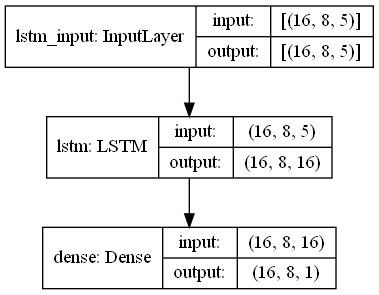

In [36]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

lstm_model.summary()

from keras.utils import plot_model
plot_model(lstm_model, to_file='model.png',
               show_shapes=True,
 #   show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)


### curve 1 only

In [37]:

"""
lstm_model = get_compiled_model()
filename='log_c1.csv'
history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)
hist = fit_model(lstm_model, wide_window, epochs_num=100, verb=0, stop=[early_stopping,history_logger])

np.save('history2.npy',hist.history)
history2=np.load('history2.npy',allow_pickle='TRUE').item()

"""

'\nlstm_model = get_compiled_model()\nfilename=\'log_c1.csv\'\nhistory_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)\nhist = fit_model(lstm_model, wide_window, epochs_num=100, verb=0, stop=[early_stopping,history_logger])\n\nnp.save(\'history2.npy\',hist.history)\nhistory2=np.load(\'history2.npy\',allow_pickle=\'TRUE\').item()\n\n'

In [38]:
#batch_size=16

MODEL_SAVE_FOLDER_PATH = './model/'
if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
  os.mkdir(MODEL_SAVE_FOLDER_PATH)

#model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}-{val_loss:.4f}.hdf5'
model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}.hdf5'

model_dir = os.path.dirname(model_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=model_path,
  # monitor='val_loss',  save_freq=int(2*batch_size), verbose=1, save_best_only=True)
   monitor='val_loss',  save_freq=30 , verbose=0  )
 #   monitor='val_loss',    verbose=1, save_best_only=True)
 #  monitor='val_loss',    verbose=1 )

In [39]:
lstm_model = get_compiled_model()

wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10

hist = fit_model(lstm_model, wide_window, epochs_num=500, verb=0, stop=[])
#hist = fit_model(lstm_model, wide_window, epochs_num=10, verb=1, stop=[] )
#hist = fit_model(lstm_model, wide_window, epochs_num=100, verb=1, stop=[ cp_callback])

#IPython.display.clear_output()

loss :  [0.7470186352729797]
val_loss :  [8.247186660766602]
mae :  [0.4460778534412384]
val_mae :  [2.618697166442871]


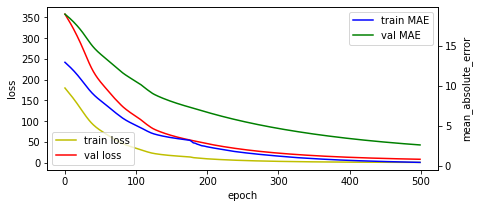

In [40]:
eval1(hist)

In [41]:
lstm_model.save("c1_16_p2_es_05k")
np.save('c1_16_p2_es_05k.npy',hist.history)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: c1_16_p2_es_05k\assets


In [42]:
#history2=np.load('c1_16_p2_es_05k.npy',allow_pickle='TRUE').item()
#eval3(history2)

In [43]:
lstm_model = get_compiled_model()

wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10

hist = fit_model(lstm_model, wide_window, epochs_num=1000, verb=0, stop=[])

loss :  [0.16720500588417053]
val_loss :  [2.333463430404663]
mae :  [0.12975391745567322]
val_mae :  [1.0346612930297852]


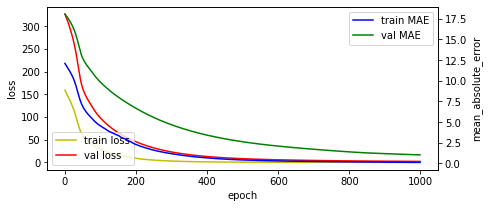

In [44]:
eval1(hist)

In [45]:
lstm_model.save("c1_16_p2_es_1k")
np.save('c1_16_p2_es_1k.npy',hist.history)

INFO:tensorflow:Assets written to: c1_16_p2_es_1k\assets


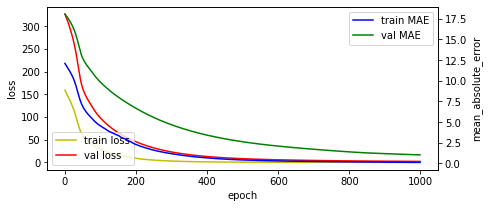

In [46]:
history2=np.load('c1_16_p2_es_1k.npy',allow_pickle='TRUE').item()
eval3(history2)

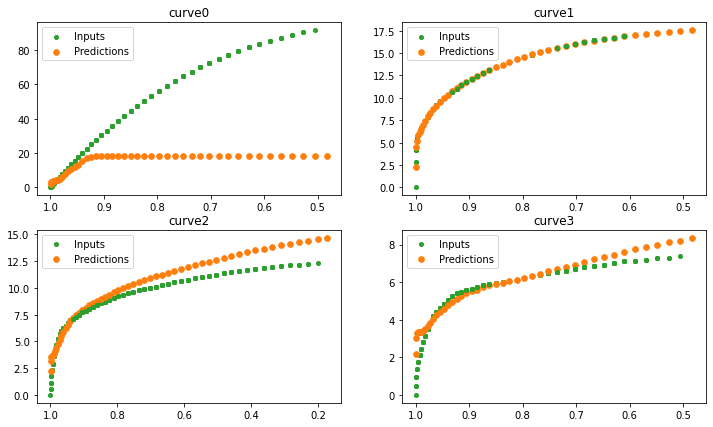

In [47]:
lstm_model = tf.keras.models.load_model("c1_16_p2_es_1k")
plot_val(lstm_model, wide_window_t)

Text(0.5, 1.0, 'curve1_train')

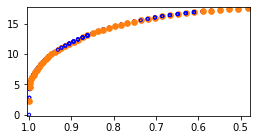

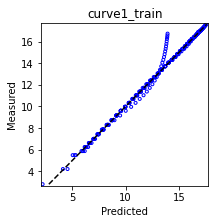

In [48]:
wide_window_t.train_df = train_df_10
wide_window_t.val_df = val_df_10
wide_window_t.test_df = test_df_10
#window_t.plot_batch(model, dset_name='train', n_batch=10 )
#plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10, dset_name = 'val')
plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10 )

subplot_title = ('curve1_train')
plt.gca().set_title(subplot_title)

In [49]:
val_mse, val_mae = lstm_model.evaluate(wide_window.val)


1/1 [==============================] - 0s 16ms/step - loss: 2.3335 - mean_absolute_error: 1.0347


#### concatenate train and val
#### curve 1

In [50]:
train_df = tf.concat ([train_df_10,val_df_10], axis=0)

In [51]:
wide_window.train_df = train_df
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10

hist = fit_model(lstm_model, wide_window, epochs_num=1000, verb=0, stop=[])

loss :  [0.001214361283928156]
val_loss :  [0.0006779633113183081]
mae :  [0.019555848091840744]
val_mae :  [0.018059372901916504]


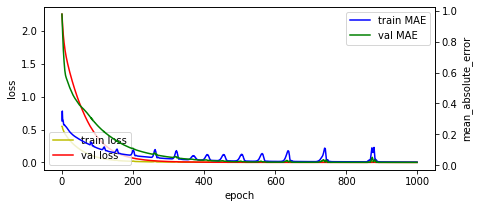

In [52]:
eval1(hist)

Text(0.5, 1.0, 'curve1_train')

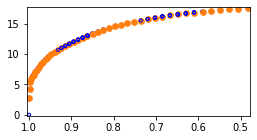

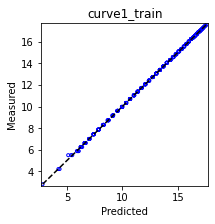

In [53]:
wide_window_t.train_df = train_df_10
wide_window_t.val_df = val_df_10
wide_window_t.test_df = test_df_10
#window_t.plot_batch(model, dset_name='train', n_batch=10 )
#plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10, dset_name = 'val')
plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10 )

subplot_title = ('curve1_train')
plt.gca().set_title(subplot_title)

In [54]:
lstm_model.save("c1_all_1k")
np.save('c1_all_1k.npy',hist.history)

INFO:tensorflow:Assets written to: c1_all_1k\assets


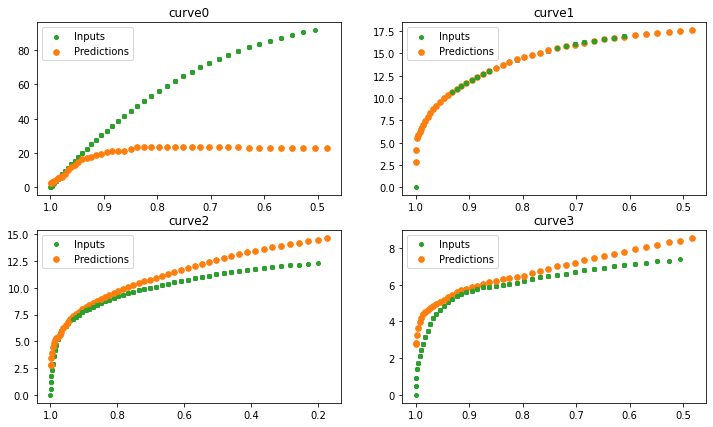

In [55]:
lstm_model = tf.keras.models.load_model("c1_all_1k")
plot_val(lstm_model, wide_window_t)

### Add curve3 to curve 1

In [56]:
lstm_model = tf.keras.models.load_model("c1_all_1k")

wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30

hist = fit_model(lstm_model, wide_window, epochs_num=30, verb=0, stop=[])

loss :  [0.03496716544032097]
val_loss :  [0.2079041749238968]
mae :  [0.0815829485654831]
val_mae :  [0.4254652261734009]


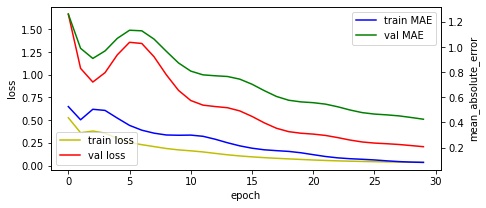

In [57]:
eval1(hist)

Text(0.5, 1.0, 'curve1_train')

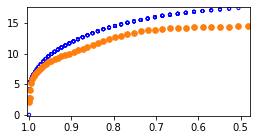

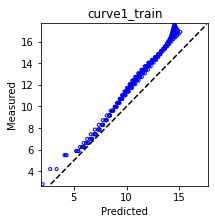

In [58]:
wide_window_t.train_df = train_df_10
wide_window_t.val_df = val_df_10
wide_window_t.test_df = test_df_10
#window_t.plot_batch(model, dset_name='train', n_batch=10 )
#plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10, dset_name = 'val')
plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10 )

subplot_title = ('curve1_train')
plt.gca().set_title(subplot_title)

Text(0.5, 1.0, 'curve3_train')

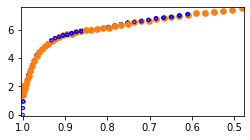

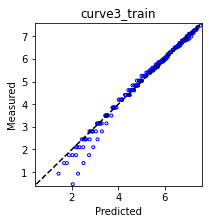

In [59]:
wide_window_t.train_df = train_df_30
wide_window_t.val_df = val_df_30
wide_window_t.test_df = test_df_30
#window_t.plot_batch(model, dset_name='train', n_batch=10 )
#plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10, dset_name = 'val')
plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10 )

subplot_title = ('curve3_train')
plt.gca().set_title(subplot_title)

In [60]:
train_df = tf.concat ([train_df_30,val_df_30], axis=0)

In [61]:
wide_window.train_df = train_df
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30

history = fit_model(lstm_model, wide_window, epochs_num=100, verb=0, stop=[] )
#history = fit_model(lstm_model, wide_window, epochs_num=10, verb=1, stop=[] )

loss :  [0.004565068054944277]
val_loss :  [0.0007091940497048199]
mae :  [0.0399617925286293]
val_mae :  [0.019636720418930054]


Text(0.5, 1.0, 'curve2_test')

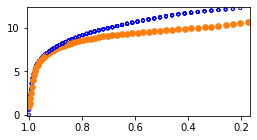

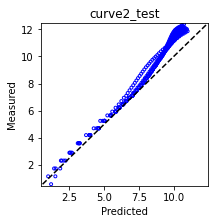

In [62]:
wide_window_t.train_df = train_df_20
wide_window_t.val_df = val_df_20
wide_window_t.test_df = test_df_20
plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10)
#plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10, dset_name = 'val' )

subplot_title = ('curve2_test')
plt.gca().set_title(subplot_title)


In [63]:
lstm_model.save("c1_all_c3_all_01k")
np.save('c1_all_c3_all_01k.npy',hist.history)

INFO:tensorflow:Assets written to: c1_all_c3_all_01k\assets


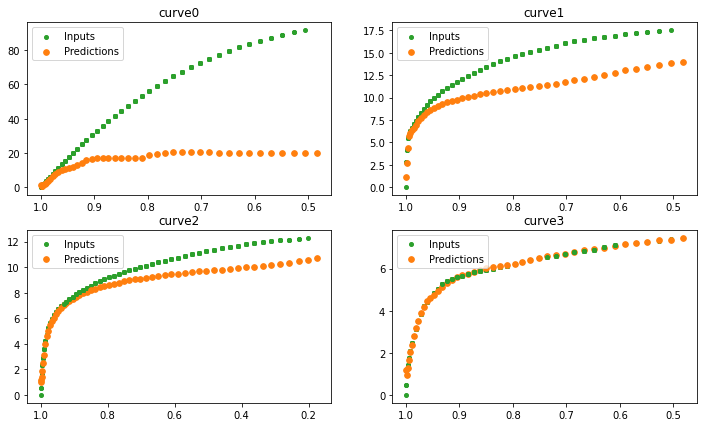

In [64]:
lstm_model = tf.keras.models.load_model("c1_all_c3_all_01k")
plot_val(lstm_model, wide_window_t)

## Add curve0

loss :  [172.31968688964844]
val_loss :  [1813.4691162109375]
mae :  [7.277238368988037]
val_mae :  [42.431583404541016]


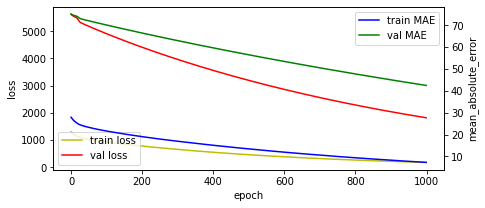

In [147]:
lstm_model = tf.keras.models.load_model("c1_all_c3_all_01k")

wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00

history = fit_model(lstm_model, wide_window, epochs_num=1000, verb=0, stop=[] )
eval1(history)

In [149]:
lstm_model.save("c1_all_c3_all_c0_1k")
np.save('c1_all_c3_all_c0_1k.npy',hist.history)

INFO:tensorflow:Assets written to: c1_all_c3_all_c0_1k\assets


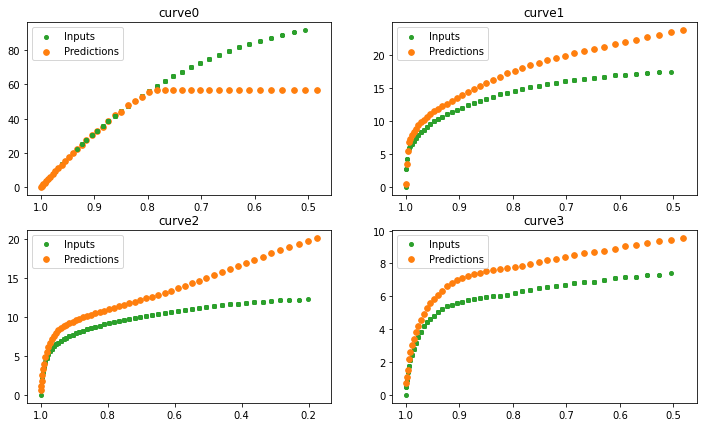

In [148]:
#lstm_model = tf.keras.models.load_model("c1_all_c3_all_c0_05k")
plot_val(lstm_model, wide_window_t)

loss :  [15.575357437133789]
val_loss :  [524.3964233398438]
mae :  [1.610640048980713]
val_mae :  [22.32250213623047]


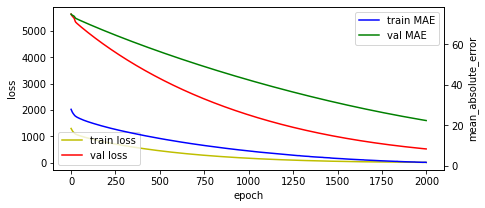

In [65]:
lstm_model = tf.keras.models.load_model("c1_all_c3_all_01k")

wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00

history = fit_model(lstm_model, wide_window, epochs_num=2000, verb=0, stop=[] )
eval1(history)

In [66]:
lstm_model.save("c1_all_c3_all_c0_2k")
np.save('c1_all_c3_all_c0_2k.npy',hist.history)

INFO:tensorflow:Assets written to: c1_all_c3_all_c0_2k\assets


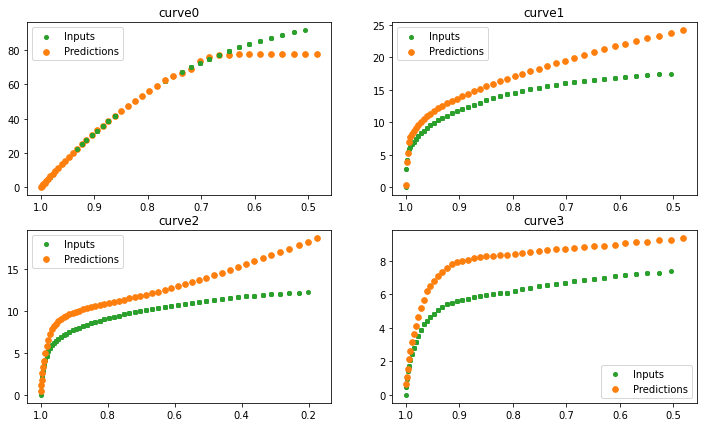

In [144]:
lstm_model = tf.keras.models.load_model("c1_all_c3_all_c0_2k")
plot_val(lstm_model, wide_window_t)

loss :  [1.7516571283340454]
val_loss :  [174.8013916015625]
mae :  [0.3770536780357361]
val_mae :  [11.836040496826172]


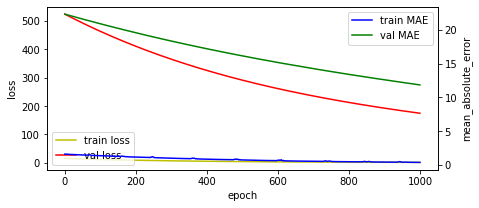

In [67]:
wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00

history = fit_model(lstm_model, wide_window, epochs_num=1000, verb=0, stop=[] )
eval1(history)

In [68]:
lstm_model.save("c1_all_c3_all_c0_2+1k")
np.save('c1_all_c3_all_c0_2+1k.npy',hist.history)

INFO:tensorflow:Assets written to: c1_all_c3_all_c0_2+1k\assets


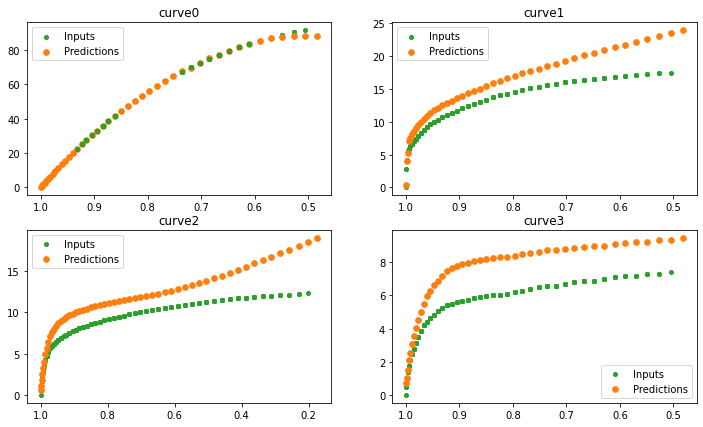

In [142]:
lstm_model = tf.keras.models.load_model("c1_all_c3_all_c0_2+1k")
plot_val(lstm_model, wide_window_t)


In [69]:
train_df = tf.concat ([train_df_00,val_df_00], axis=0)

loss :  [28.03927230834961]
val_loss :  [165.49118041992188]
mae :  [2.399688482284546]
val_mae :  [11.419833183288574]


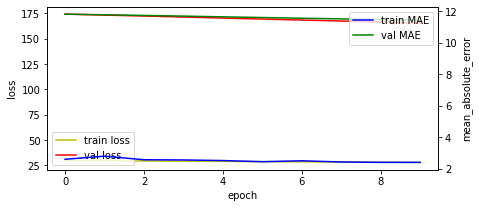

In [70]:
lstm_model = tf.keras.models.load_model("c1_all_c3_all_c0_2+1k")

wide_window.train_df = train_df
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00

history = fit_model(lstm_model, wide_window, epochs_num=10, verb=0, stop=[] )
eval1(history)

In [71]:
lstm_model.save("c1_all_c3_all_c0_all_2+1k")
np.save('c1_all_c3_all_c0_all_2+1k.npy',hist.history)


INFO:tensorflow:Assets written to: c1_all_c3_all_c0_all_2+1k\assets


In [73]:
lstm_model = tf.keras.models.load_model("c1_all_c3_all_c0_all_2+1k")

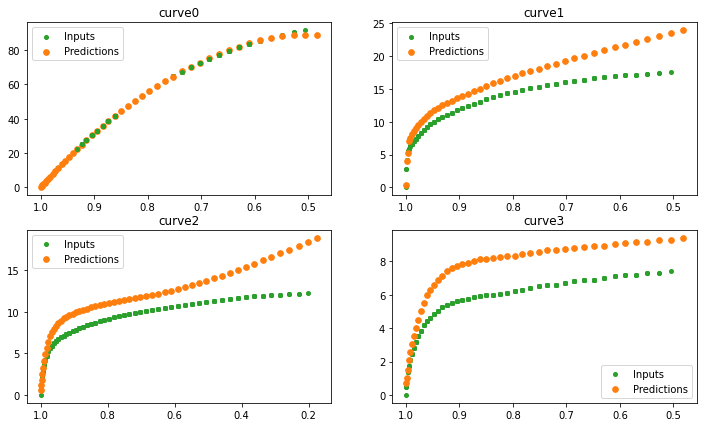

In [74]:
plot_val(lstm_model, wide_window_t)

### similar to adding other curves to curve 0 at below
#### adjust to curve3 and curve1 in appropriate epochs

loss :  [0.02151133120059967]
val_loss :  [0.018552914261817932]
mae :  [0.1275295615196228]
val_mae :  [0.11320161819458008]


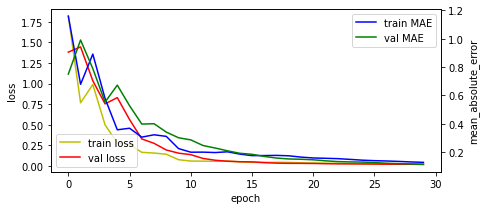

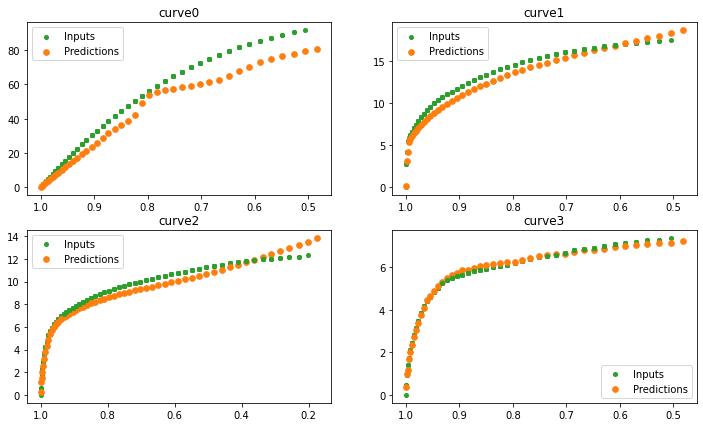

In [162]:
lstm_model = tf.keras.models.load_model("c1_all_c3_all_c0_all_2+1k")

train_df = tf.concat ([train_df_30,val_df_30], axis=0)

wide_window.train_df = train_df
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30

history = fit_model(lstm_model, wide_window, epochs_num=30, verb=0, stop=[] )
#history = fit_model(lstm_model, wide_window, epochs_num=10, verb=1, stop=[] )
eval1(history)

plot_val(lstm_model, wide_window_t)

In [163]:
lstm_model.save("c1_all_c3_all_c0_all_2+1k+c3")
np.save('c1_all_c3_all_c0_all_2+1k+c3.npy',hist.history)

INFO:tensorflow:Assets written to: c1_all_c3_all_c0_all_2+1k+c3\assets


loss :  [0.24101005494594574]
val_loss :  [0.12496691942214966]
mae :  [0.3834221661090851]
val_mae :  [0.27935200929641724]


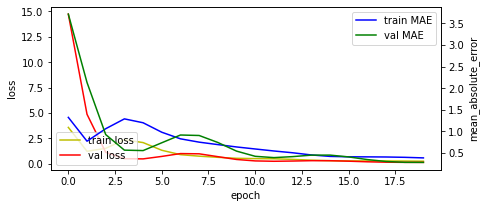

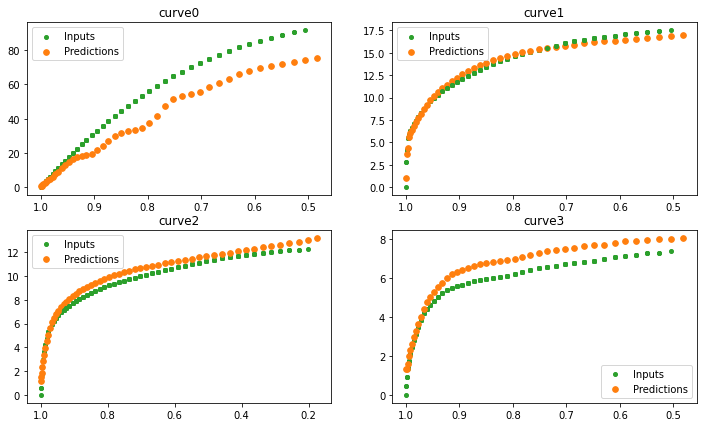

In [169]:
lstm_model = tf.keras.models.load_model("c1_all_c3_all_c0_all_2+1k+c3")

train_df = tf.concat ([train_df_10,val_df_10], axis=0)

wide_window.train_df = train_df
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10

history = fit_model(lstm_model, wide_window, epochs_num=20, verb=0, stop=[] )
#history = fit_model(lstm_model, wide_window, epochs_num=10, verb=1, stop=[] )
eval1(history)


plot_val(lstm_model, wide_window_t)

In [165]:
lstm_model.save("c1_all_c3_all_c0_all_2+1k+c3+c1")
np.save('c1_all_c3_all_c0_all_2+1k+c3+c1.npy',hist.history)

INFO:tensorflow:Assets written to: c1_all_c3_all_c0_all_2+1k+c3+c1\assets


### curve 1 first

loss :  [0.3553211987018585]
val_loss :  [0.701622486114502]
mae :  [0.4926305413246155]
val_mae :  [0.7416532635688782]
loss :  [0.020024556666612625]
val_loss :  [0.02428366057574749]
mae :  [0.11884846538305283]
val_mae :  [0.1352187842130661]


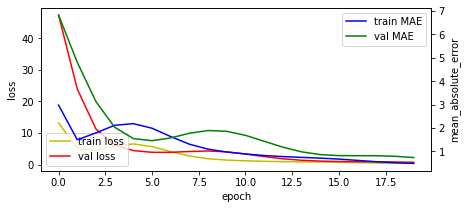

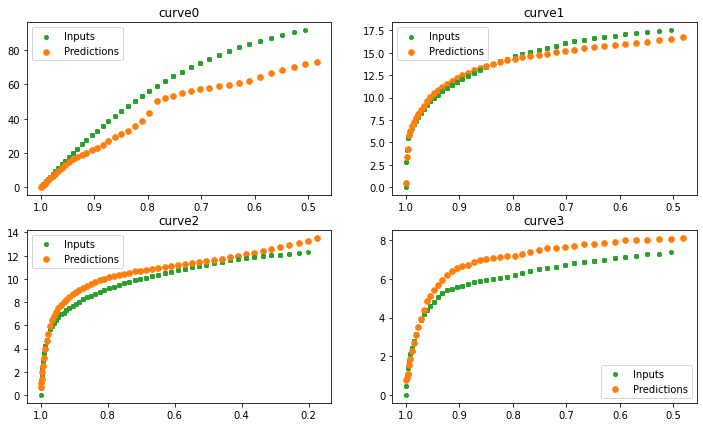

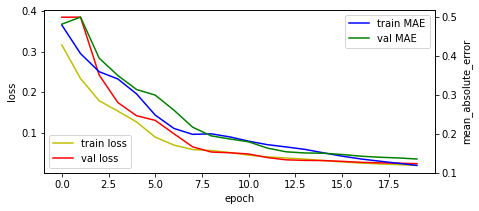

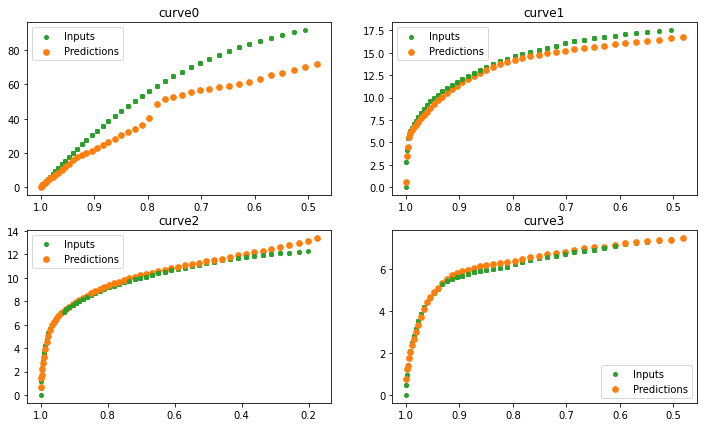

In [179]:
lstm_model = tf.keras.models.load_model("c1_all_c3_all_c0_all_2+1k")

train_df = tf.concat ([train_df_10,val_df_10], axis=0)

wide_window.train_df = train_df
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10

history = fit_model(lstm_model, wide_window, epochs_num=20, verb=0, stop=[] )
#history = fit_model(lstm_model, wide_window, epochs_num=10, verb=1, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)
#----------------------------------------
train_df = tf.concat ([train_df_30,val_df_30], axis=0)

wide_window.train_df = train_df
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30

history = fit_model(lstm_model, wide_window, epochs_num=20, verb=0, stop=[] )
#history = fit_model(lstm_model, wide_window, epochs_num=10, verb=1, stop=[] )
eval1(history)

plot_val(lstm_model, wide_window_t)

loss :  [29.5988712310791]
val_loss :  [150.198486328125]
mae :  [3.427030086517334]
val_mae :  [10.699085235595703]
loss :  [0.03214668855071068]
val_loss :  [0.02767457254230976]
mae :  [0.13609196245670319]
val_mae :  [0.10942186415195465]


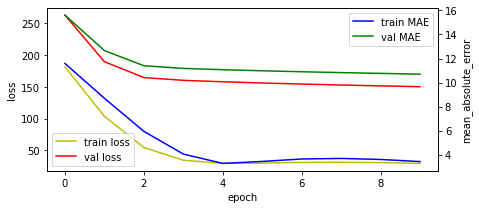

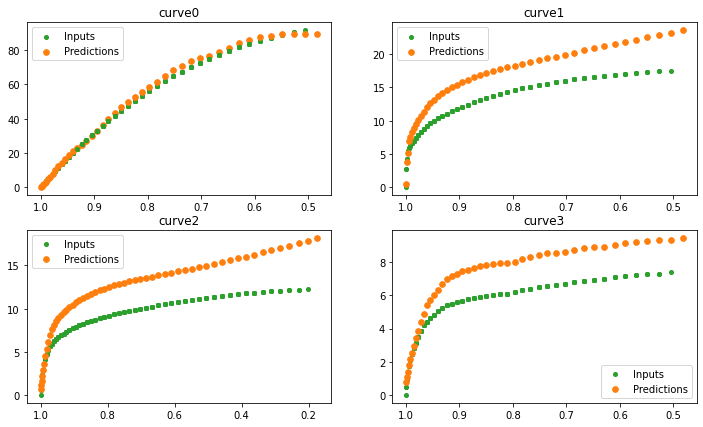

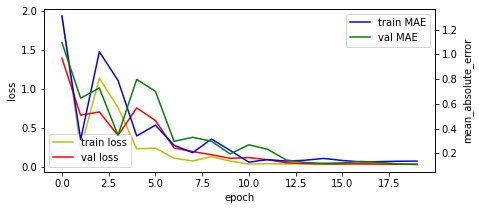

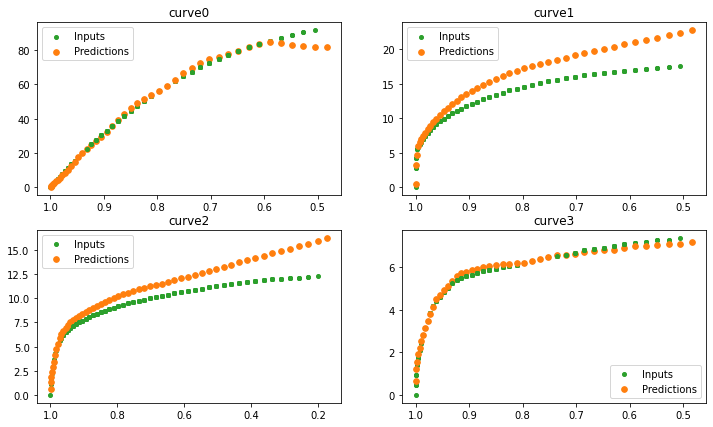

In [180]:
#----------------------------------------
train_df = tf.concat ([train_df_00,val_df_00], axis=0)

wide_window.train_df = train_df
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00

history = fit_model(lstm_model, wide_window, epochs_num=10, verb=0, stop=[] )
#history = fit_model(lstm_model, wide_window, epochs_num=10, verb=1, stop=[] )
eval1(history)

plot_val(lstm_model, wide_window_t)
#----------------------------------------
train_df = tf.concat ([train_df_30,val_df_30], axis=0)

wide_window.train_df = train_df
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30

history = fit_model(lstm_model, wide_window, epochs_num=20, verb=0, stop=[] )
#history = fit_model(lstm_model, wide_window, epochs_num=10, verb=1, stop=[] )
eval1(history)

plot_val(lstm_model, wide_window_t)

In [ ]:
lstm_model.save("c1_all_c3_all_c0_all_2+1k+c1")
np.save('c1_all_c3_all_c0_all_2+1k+c1.npy',hist.history)


#### curve 3 Only ------- dummy

In [76]:
lstm_model = get_compiled_model()

wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30

history = fit_model(lstm_model, wide_window, epochs_num=500, verb=0)
#history = fit_model(lstm_model, wide_window, epochs_num=10, verb=1, stop=[] )

loss :  [0.023202911019325256]
val_loss :  [0.2625335454940796]
mae :  [0.07048655301332474]
val_mae :  [0.24076519906520844]


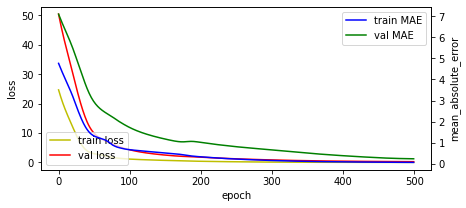

In [77]:
eval1(history)

In [78]:
lstm_model.save("c3_16_p2_es_05k")
np.save('c3_16_p2_es_05k.npy',hist.history)

INFO:tensorflow:Assets written to: c3_16_p2_es_05k\assets


Text(0.5, 1.0, 'curve3_train')

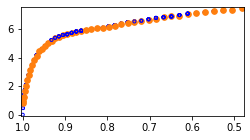

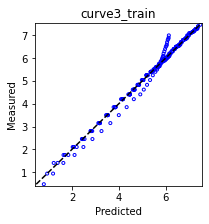

In [79]:
wide_window_t.train_df = train_df_30
wide_window_t.val_df = val_df_30
wide_window_t.test_df = test_df_30
#window_t.plot_batch(model, dset_name='train', n_batch=10 )
#plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10, dset_name = 'val')
plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10 )

subplot_title = ('curve3_train')
plt.gca().set_title(subplot_title)

# Another training
#### add others to curve0

### curve0 Only

loss :  [95.6298828125]
val_loss :  [1310.73828125]
mae :  [4.979480743408203]
val_mae :  [35.976531982421875]


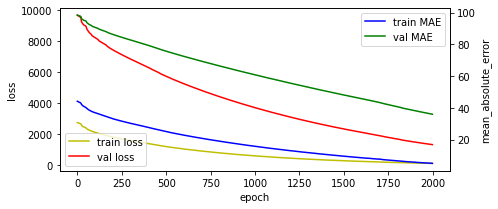

In [80]:
lstm_model = get_compiled_model()

wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00

history = fit_model(lstm_model, wide_window, epochs_num=2000, verb=0, stop=[] )
eval1(history)


Text(0.5, 1.0, 'curve0_train')

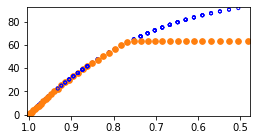

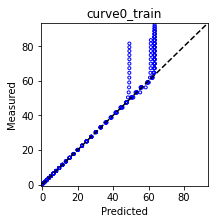

In [81]:
wide_window_t.train_df = train_df_00
wide_window_t.val_df = val_df_00
wide_window_t.test_df = test_df_00
#window_t.plot_batch(model, dset_name='train', n_batch=10 )
#plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10, dset_name = 'val')
plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10 )

subplot_title = ('curve0_train')
plt.gca().set_title(subplot_title)

In [82]:
lstm_model.save("c0_16_p2_es_2k")
np.save('c0_16_p2_es_2k.npy',history.history)


INFO:tensorflow:Assets written to: c0_16_p2_es_2k\assets


loss :  [4.717617988586426]
val_loss :  [300.73980712890625]
mae :  [0.738386332988739]
val_mae :  [16.445026397705078]


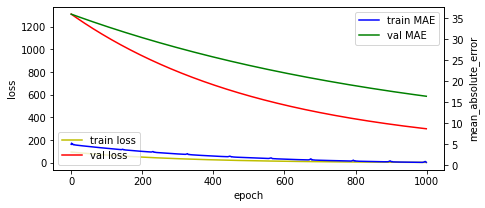

In [83]:
lstm_model = tf.keras.models.load_model("c0_16_p2_es_2k")

history = fit_model(lstm_model, wide_window, epochs_num=1000, verb=0, stop=[] )
eval1(history)

Text(0.5, 1.0, 'curve0_train')

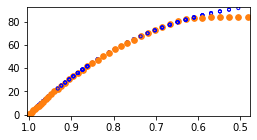

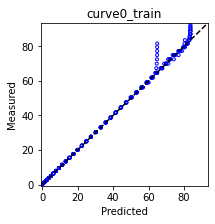

In [84]:
wide_window_t.train_df = train_df_00
wide_window_t.val_df = val_df_00
wide_window_t.test_df = test_df_00
#window_t.plot_batch(model, dset_name='train', n_batch=10 )
#plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10, dset_name = 'val')
plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10 )

subplot_title = ('curve0_train')
plt.gca().set_title(subplot_title)

In [85]:
lstm_model.save("c0_16_p2_es_2+1k")
np.save('c0_16_p2_es_2+1k.npy',history.history)

INFO:tensorflow:Assets written to: c0_16_p2_es_2+1k\assets


In [86]:
train_df = tf.concat ([train_df_00,val_df_00], axis=0)

In [87]:
lstm_model = tf.keras.models.load_model("c0_16_p2_es_2+1k")

wide_window.train_df = train_df
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00

history = fit_model(lstm_model, wide_window, epochs_num=200, verb=0, stop=[] )
#history = fit_model(lstm_model, wide_window, epochs_num=10, verb=1, stop=[] )

loss :  [20.09545135498047]
val_loss :  [122.90865325927734]
mae :  [1.842402696609497]
val_mae :  [9.297422409057617]


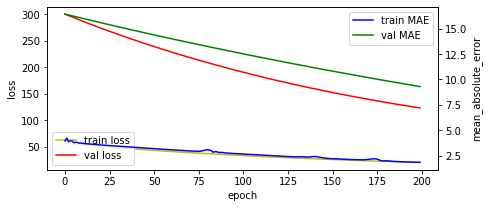

In [88]:
eval1(history)

Text(0.5, 1.0, 'curve0_train')

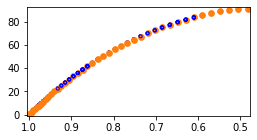

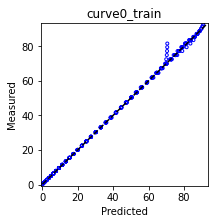

In [89]:
wide_window_t.train_df = train_df_00
wide_window_t.val_df = val_df_00
wide_window_t.test_df = test_df_00
#window_t.plot_batch(model, dset_name='train', n_batch=10 )
#plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10, dset_name = 'val')
plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10 )

subplot_title = ('curve0_train')
plt.gca().set_title(subplot_title)

In [90]:
lstm_model.save("c0_all")
np.save('c0_all.npy',history.history)

INFO:tensorflow:Assets written to: c0_all\assets


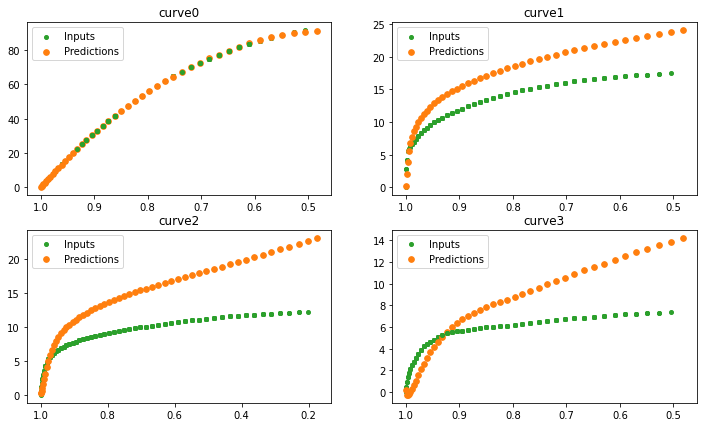

In [91]:
lstm_model = tf.keras.models.load_model("c0_all")
plot_val(lstm_model, wide_window_t)



### Add curve0 to curve 1

loss :  [607.1629028320312]
val_loss :  [3799.8466796875]
mae :  [16.163156509399414]
val_mae :  [61.60344696044922]


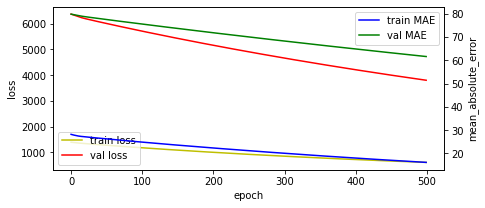

In [92]:
lstm_model = tf.keras.models.load_model("c1_16_p2_es_1k")

wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00
history = fit_model(lstm_model, wide_window, epochs_num=500, verb=0, stop=[] )
eval1(history)

Text(0.5, 1.0, 'curve0_train')

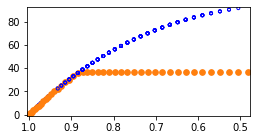

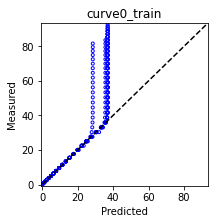

In [93]:
wide_window_t.train_df = train_df_00
wide_window_t.val_df = val_df_00
wide_window_t.test_df = test_df_00
#window_t.plot_batch(model, dset_name='train', n_batch=10 )
#plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10, dset_name = 'val')
plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10 )
subplot_title = ('curve0_train')
plt.gca().set_title(subplot_title)

## Add other curves to curve 0 --->  not good ??
### now, try

### Add curve1 to curve0 500 ephochs

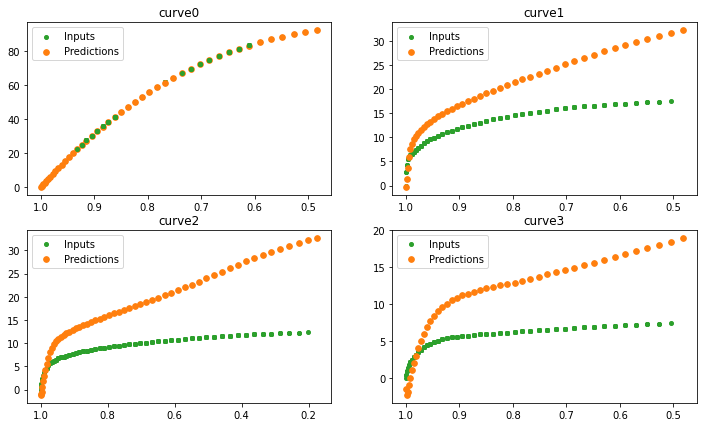

In [94]:
lstm_model = tf.keras.models.load_model("c0_16_p2_es_2+2k")
plot_val(lstm_model, wide_window_t)

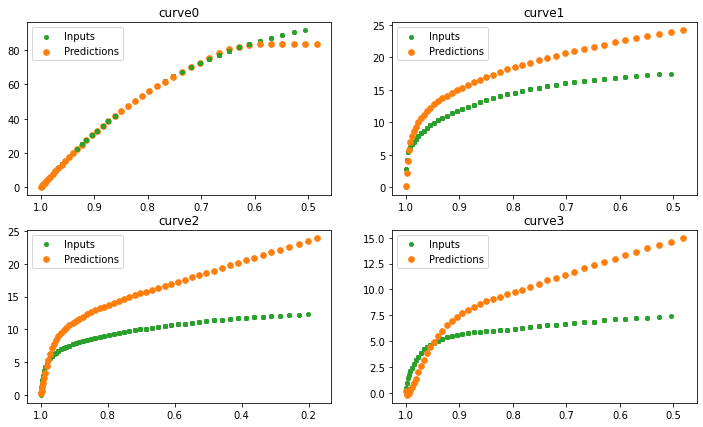

In [95]:
lstm_model = tf.keras.models.load_model("c0_16_p2_es_2+1k")
plot_val(lstm_model, wide_window_t)

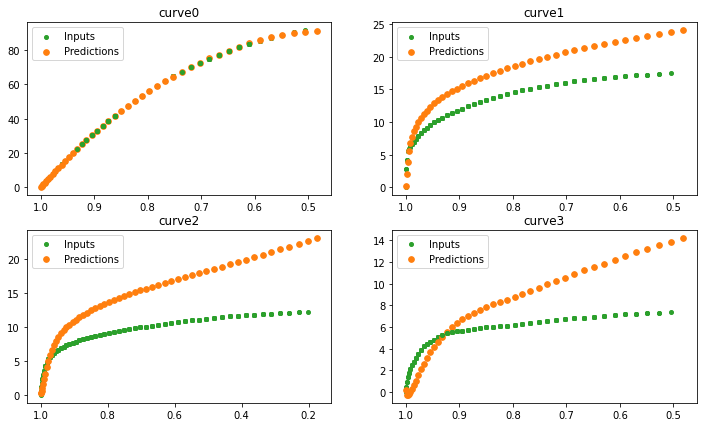

In [96]:
lstm_model = tf.keras.models.load_model("c0_all")
plot_val(lstm_model, wide_window_t)

loss :  [0.009029331617057323]
val_loss :  [1.3705010414123535]
mae :  [0.06360717862844467]
val_mae :  [1.0712515115737915]


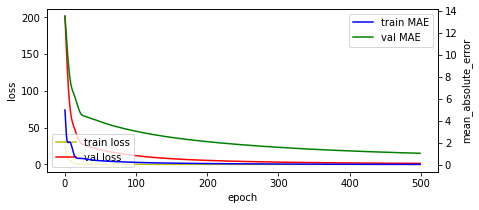

In [97]:
lstm_model = tf.keras.models.load_model("c0_16_p2_es_2+2k")

wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
history = fit_model(lstm_model, wide_window, epochs_num=500, verb=0, stop=[] )
eval1(history)

Text(0.5, 1.0, 'curve1_train')

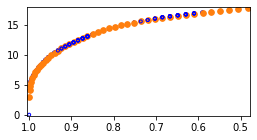

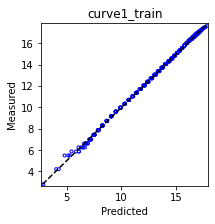

In [98]:
wide_window_t.train_df = train_df_10
wide_window_t.val_df = val_df_10
wide_window_t.test_df = test_df_10
#window_t.plot_batch(model, dset_name='train', n_batch=10 )
#plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10, dset_name = 'val')
plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10 )
subplot_title = ('curve1_train')
plt.gca().set_title(subplot_title)

Text(0.5, 1.0, 'curve0_train')

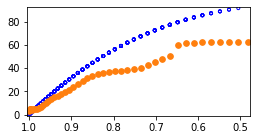

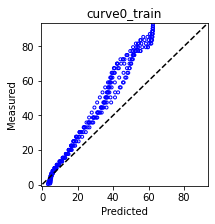

In [99]:
wide_window_t.train_df = train_df_00
wide_window_t.val_df = val_df_00
wide_window_t.test_df = test_df_00
#window_t.plot_batch(model, dset_name='train', n_batch=10 )
#plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10, dset_name = 'val')
plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10 )
subplot_title = ('curve0_train')
plt.gca().set_title(subplot_title)

In [100]:
lstm_model.save("c0_c1_2+2k_05k")
np.save('c0_c1_2+2k_05k.npy',hist.history)

INFO:tensorflow:Assets written to: c0_c1_2+2k_05k\assets


In [101]:
lstm_model = tf.keras.models.load_model("c0_c1_2+2k_05k")

### Add curve1 to curve0 100 ephochs

loss :  [0.10395483672618866]
val_loss :  [11.97142505645752]
mae :  [0.24838055670261383]
val_mae :  [3.0811407566070557]


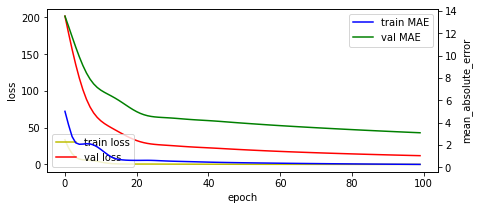

In [102]:
lstm_model = tf.keras.models.load_model("c0_16_p2_es_2+2k")
wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
history = fit_model(lstm_model, wide_window, epochs_num=100, verb=0, stop=[] )
eval1(history)

Text(0.5, 1.0, 'curve1_train')

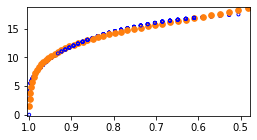

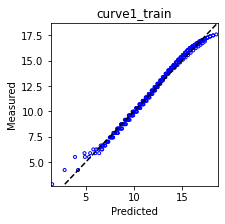

In [103]:
wide_window_t.train_df = train_df_10
wide_window_t.val_df = val_df_10
wide_window_t.test_df = test_df_10
#window_t.plot_batch(model, dset_name='train', n_batch=10 )
#plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10, dset_name = 'val')
plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10 )
subplot_title = ('curve1_train')
plt.gca().set_title(subplot_title)

Text(0.5, 1.0, 'curve0_train')

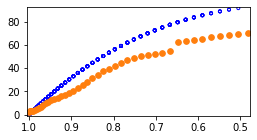

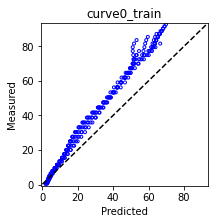

In [104]:
wide_window_t.train_df = train_df_00
wide_window_t.val_df = val_df_00
wide_window_t.test_df = test_df_00
#window_t.plot_batch(model, dset_name='train', n_batch=10 )
#plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10, dset_name = 'val')
plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10 )
subplot_title = ('curve0_train')
plt.gca().set_title(subplot_title)

In [105]:
lstm_model.save("c0_c1_2+2k_01k")
np.save('c0_c1_2+2k_01k.npy',hist.history)

INFO:tensorflow:Assets written to: c0_c1_2+2k_01k\assets


### add curve1 to curve0 50 ephochs

loss :  [0.263782799243927]
val_loss :  [20.247774124145508]
mae :  [0.39760610461235046]
val_mae :  [3.957468032836914]


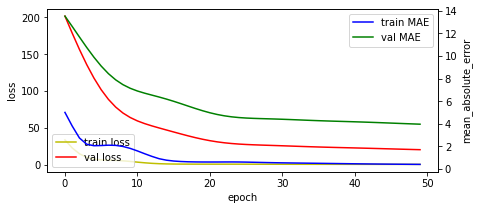

In [106]:
lstm_model = tf.keras.models.load_model("c0_16_p2_es_2+2k")
wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
history = fit_model(lstm_model, wide_window, epochs_num=50, verb=0, stop=[] )
eval1(history)

Text(0.5, 1.0, 'curve1_train')

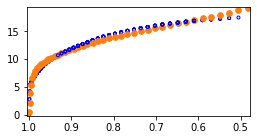

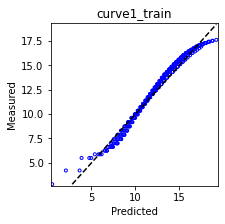

In [107]:
wide_window_t.train_df = train_df_10
wide_window_t.val_df = val_df_10
wide_window_t.test_df = test_df_10
#window_t.plot_batch(model, dset_name='train', n_batch=10 )
#plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10, dset_name = 'val')
plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10 )
subplot_title = ('curve1_train')
plt.gca().set_title(subplot_title)

Text(0.5, 1.0, 'curve0_train')

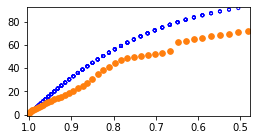

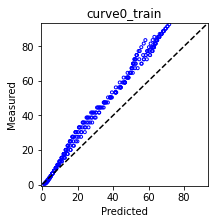

In [108]:
wide_window_t.train_df = train_df_00
wide_window_t.val_df = val_df_00
wide_window_t.test_df = test_df_00
#window_t.plot_batch(model, dset_name='train', n_batch=10 )
#plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10, dset_name = 'val')
plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10 )
subplot_title = ('curve0_train')
plt.gca().set_title(subplot_title)

In [109]:
lstm_model.save("c0_c1_2+2k_005k")
np.save('c0_c1_2+2k_005k.npy',hist.history)

INFO:tensorflow:Assets written to: c0_c1_2+2k_005k\assets


### add curve1 to curve0 15 ephochs

loss :  [0.9052802920341492]
val_loss :  [47.04035949707031]
mae :  [0.7708250284194946]
val_mae :  [6.181103706359863]


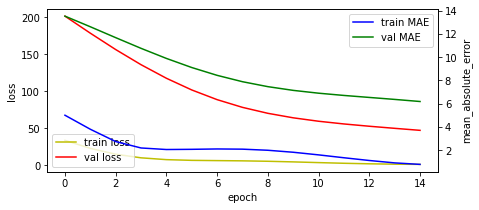

In [110]:
lstm_model = tf.keras.models.load_model("c0_16_p2_es_2+2k")
wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
history = fit_model(lstm_model, wide_window, epochs_num=15, verb=0, stop=[] )
eval1(history)

Text(0.5, 1.0, 'curve1_train')

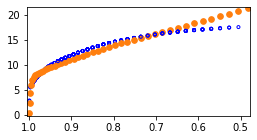

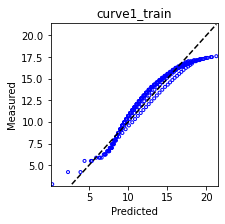

In [111]:
wide_window_t.train_df = train_df_10
wide_window_t.val_df = val_df_10
wide_window_t.test_df = test_df_10
#window_t.plot_batch(model, dset_name='train', n_batch=10 )
#plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10, dset_name = 'val')
plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10 )
subplot_title = ('curve1_train')
plt.gca().set_title(subplot_title)

Text(0.5, 1.0, 'curve0_train')

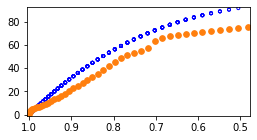

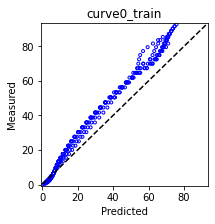

In [112]:
wide_window_t.train_df = train_df_00
wide_window_t.val_df = val_df_00
wide_window_t.test_df = test_df_00
#window_t.plot_batch(model, dset_name='train', n_batch=10 )
#plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10, dset_name = 'val')
plot_xy1(lstm_model, wide_window, wide_window_t, n_batch=10 )
subplot_title = ('curve0_train')
plt.gca().set_title(subplot_title)

In [113]:
lstm_model.save("c0_c1_2+2k_0015k")
np.save('c0_c1_2+2k_0015k.npy',history.history)

INFO:tensorflow:Assets written to: c0_c1_2+2k_0015k\assets


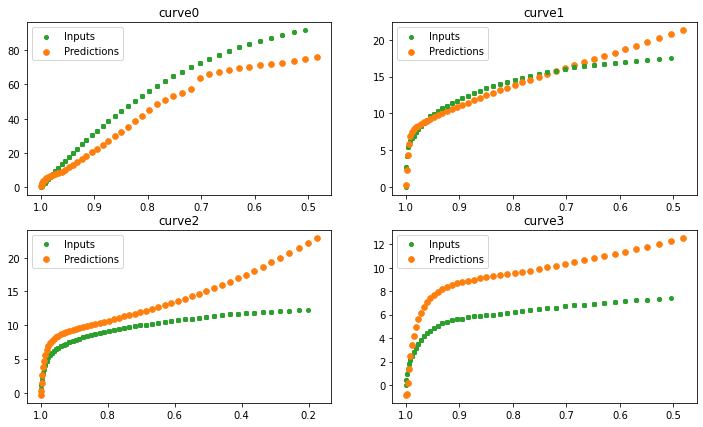

In [114]:
plot_val(lstm_model, wide_window_t)

### for c0_all add c1 + concatenate c1.val

loss :  [0.12138471752405167]
val_loss :  [2.8091628551483154]
mae :  [0.2652345299720764]
val_mae :  [1.592313528060913]


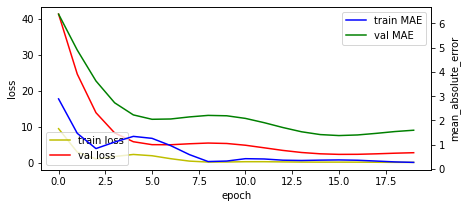

In [115]:
lstm_model = tf.keras.models.load_model("c0_all")
wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
history = fit_model(lstm_model, wide_window, epochs_num=20, verb=0, stop=[] )
eval1(history)

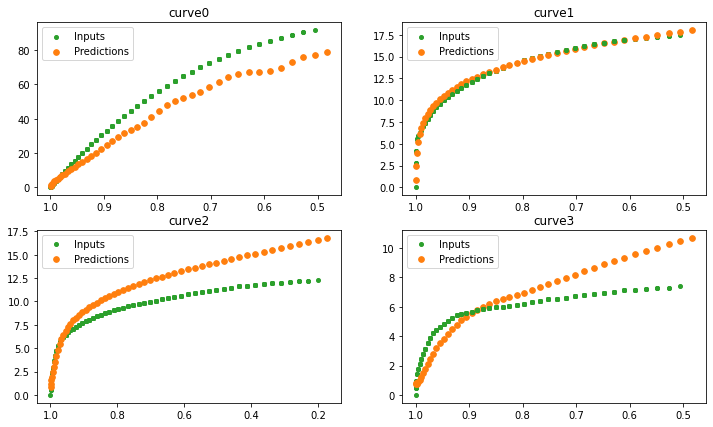

In [116]:
plot_val(lstm_model, wide_window_t)

In [117]:
lstm_model.save("c0_all_c1_002k")
np.save('c0_all_c1_002k.npy',history.history)


INFO:tensorflow:Assets written to: c0_all_c1_002k\assets


In [118]:
train_df = tf.concat ([train_df_10,val_df_10], axis=0)

loss :  [0.13670234382152557]
val_loss :  [0.10072366893291473]
mae :  [0.2708222270011902]
val_mae :  [0.2375885248184204]


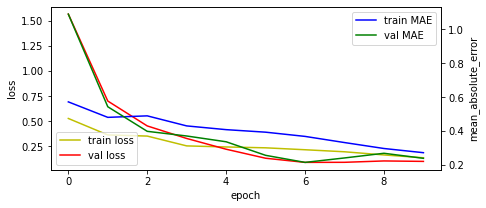

In [119]:
lstm_model = tf.keras.models.load_model("c0_all_c1_002k")

wide_window.train_df = train_df
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10

history = fit_model(lstm_model, wide_window, epochs_num=10, verb=0, stop=[] )
#history = fit_model(lstm_model, wide_window, epochs_num=10, verb=1, stop=[] )
eval1(history)

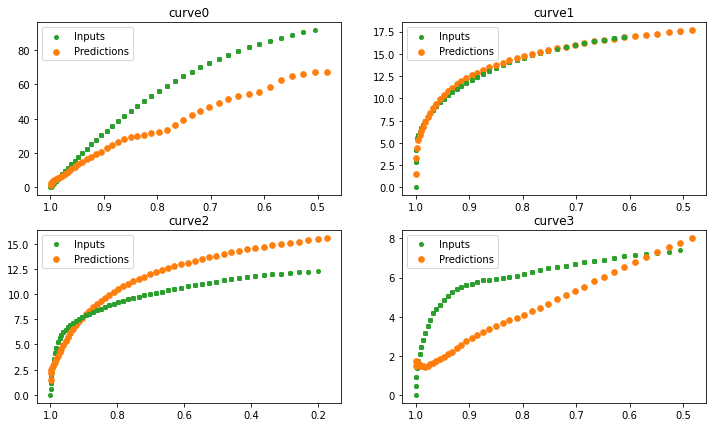

In [120]:
plot_val(lstm_model, wide_window_t)

In [121]:
lstm_model.save("c0_all_c1_all_001k")
np.save('c0_all_c1_all_001k.npy',history.history)


INFO:tensorflow:Assets written to: c0_all_c1_all_001k\assets


### looks not good results by adding others to "curve0"


### add curve3 to curve0 after adding curve 1

loss :  [0.5138064026832581]
val_loss :  [3.8048338890075684]
mae :  [0.5818267464637756]
val_mae :  [1.8423856496810913]


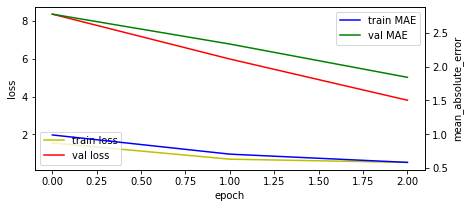

In [122]:
lstm_model = tf.keras.models.load_model("c0_all_c1_all_001k")
wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
history = fit_model(lstm_model, wide_window, epochs_num=3, verb=0, stop=[] )
eval1(history)

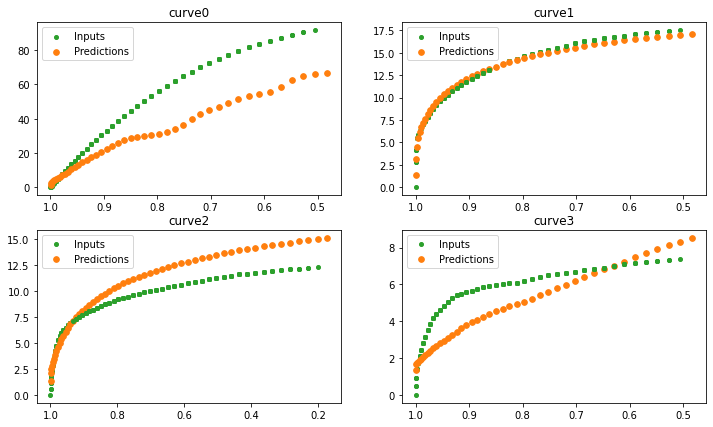

In [123]:
plot_val(lstm_model, wide_window_t)



In [124]:
lstm_model.save("c0_c1_c3_0015k+005")
np.save('c0_c1_c3_0015k+005.npy',history.history)

INFO:tensorflow:Assets written to: c0_c1_c3_0015k+005\assets


#### not good adding curves to curve 0 !
#### rather start from curve 1 or curve 3 to curve 0, and then test by curve 2


### validation


In [125]:
"""
wide_window.val_df = val_df_00
val_loss, val_mae = lstm_model.evaluate(wide_window.val)
wide_window.train_df = train_df_00
train_loss, train_mae = lstm_model.evaluate(wide_window.train)

wide_window.val_df = val_df_10
val_loss, val_mae = lstm_model.evaluate(wide_window.val)
wide_window.train_df = train_df_10
train_loss, train_mae = lstm_model.evaluate(wide_window.train)

wide_window.val_df = val_df_20
val_loss, val_mae = lstm_model.evaluate(wide_window.val)
wide_window.train_df = train_df_20
train_loss, train_mae = lstm_model.evaluate(wide_window.train)

wide_window.val_df = val_df_30
val_loss, val_mae = lstm_model.evaluate(wide_window.val)
wide_window.train_df = train_df_30
train_loss, train_mae = lstm_model.evaluate(wide_window.train)

wide_window_t.train_df = train_df_00
wide_window_t.val_df = val_df_00
wide_window_t.test_df = test_df_00
plot_xy1(lstm_model, window_t=wide_window_t,  n_batch=10)
subplot_title = ('curve0_train')
plt.gca().set_title(subplot_title)

wide_window_t.train_df = train_df_10
wide_window_t.val_df = val_df_10
wide_window_t.test_df = test_df_10
plot_xy1(lstm_model, window_t=wide_window_t,  n_batch=10)
subplot_title = ('curve1_train')
plt.gca().set_title(subplot_title)

wide_window_t.train_df = train_df_20
wide_window_t.val_df = val_df_20
wide_window_t.test_df = test_df_20
plot_xy1(lstm_model, window_t=wide_window_t,  n_batch=10)
subplot_title = ('curve2_train')
plt.gca().set_title(subplot_title)

wide_window_t.train_df = train_df_30
wide_window_t.val_df = val_df_30
wide_window_t.test_df = test_df_30
plot_xy1(lstm_model, window_t=wide_window_t,  n_batch=10)
subplot_title = ('curve3_train')
plt.gca().set_title(subplot_title)

#plt.show()
"""

"\nwide_window.val_df = val_df_00\nval_loss, val_mae = lstm_model.evaluate(wide_window.val)\nwide_window.train_df = train_df_00\ntrain_loss, train_mae = lstm_model.evaluate(wide_window.train)\n\nwide_window.val_df = val_df_10\nval_loss, val_mae = lstm_model.evaluate(wide_window.val)\nwide_window.train_df = train_df_10\ntrain_loss, train_mae = lstm_model.evaluate(wide_window.train)\n\nwide_window.val_df = val_df_20\nval_loss, val_mae = lstm_model.evaluate(wide_window.val)\nwide_window.train_df = train_df_20\ntrain_loss, train_mae = lstm_model.evaluate(wide_window.train)\n\nwide_window.val_df = val_df_30\nval_loss, val_mae = lstm_model.evaluate(wide_window.val)\nwide_window.train_df = train_df_30\ntrain_loss, train_mae = lstm_model.evaluate(wide_window.train)\n\nwide_window_t.train_df = train_df_00\nwide_window_t.val_df = val_df_00\nwide_window_t.test_df = test_df_00\nplot_xy1(lstm_model, window_t=wide_window_t,  n_batch=10)\nsubplot_title = ('curve0_train')\nplt.gca().set_title(subplot_

### hyperparameters

# batch plot

Text(0.5, 1.0, 'val')

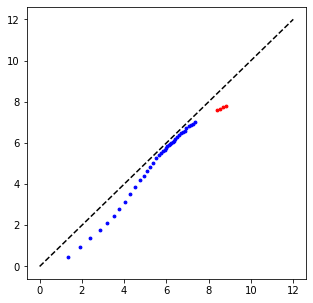

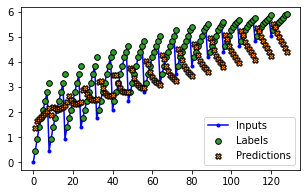

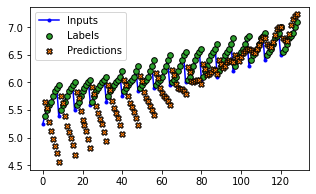

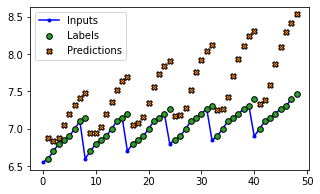

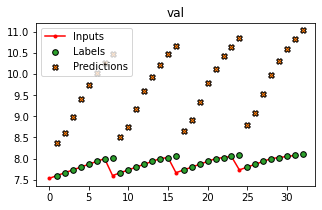

In [126]:
n = len(df)*0.5
crv_tr = train_df_30
crv_va = val_df_30
crv_te = test_df_30

window_t = wide_window_t
model = lstm_model
n_batch = 30

window_t.train_df = crv_tr
window_t.val_df = crv_va


#window_t.plot_batch(model, dset_name='train', n_batch=10 )
input_indices = np.arange(wide_window_t.total_window_size*16-16 )[slice(0, wide_window_t.total_window_size*16 -1, None)]
label_indices = np.arange(wide_window_t.total_window_size*16-15 )[slice(1, None, None)]

#fig, ax5 = plt.subplots(figsize =(5,3))
#ax5.margins(0.01)
fig, ax3 = plt.subplots(figsize =(5,5))

markers = ["X","o", "s", "D", "h"]
colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

data = [window_t.train, window_t.val]
for j, dataset in enumerate(data) :

      for i, batch in enumerate(dataset) :
            fig, ax5 = plt.subplots(figsize =(5,3))
            inputs, labels, lab = batch
            predictions = model(inputs)

            in3 = np.array(inputs, dtype=np.float32)
            #in3 = tf.convert_to_tensor(data, dtype=tf.float32)
            in3 = in3.reshape(8*len(inputs),5)
            in3 = tf.convert_to_tensor(in3, dtype=tf.float32)

            la3 = np.array(labels, dtype=np.float32)
            la3 = la3.reshape(8*len(inputs),1)
            la3 = tf.convert_to_tensor(la3, dtype=tf.float32)

            pr3 = np.array(predictions, dtype=np.float32)
            pr3 = pr3.reshape(8*len(inputs),1)
            pr3 = tf.convert_to_tensor(pr3, dtype=tf.float32)

          #  ax5.scatter(input_indices, inputs[:, :, 1],label='Inputs', marker='.',
            ax5.plot(input_indices[:8*len(inputs)], in3[:,1],label='Inputs', marker='.',
                        color=colors[j], zorder=-10 )
            ax5.scatter(label_indices[:8*len(inputs)], la3[:],label='Labels', marker='o',
                    edgecolors='k', c='#2ca02c', s=32)
            #ax5.scatter(label_indices,   predictions[:, :, 0], label='Predictions',
            ax5.scatter(label_indices[:(8*len(inputs))],   pr3[:], label='Predictions',
                          marker='X',  edgecolors='k', c='#ff7f0e', s=32)
            ax3.scatter(predictions[:, 0, 0], labels[:, 0, 0],
#            ax3.scatter(predictions[:, :, 0], labels[:, :, 0],
                        marker='.',color=colors[j], s=32)

            #if i == 0:
            ax5.legend()

            if n_batch is not None :
                    if n_batch <= i :
                        break
                    else:
                        continue
            else :
                continue

ax3.plot([0, 12], [0, 12], 'k--') # dashed diagonal
#ax5.invert_xaxis()


subplot_title = ('val')
plt.gca().set_title(subplot_title)


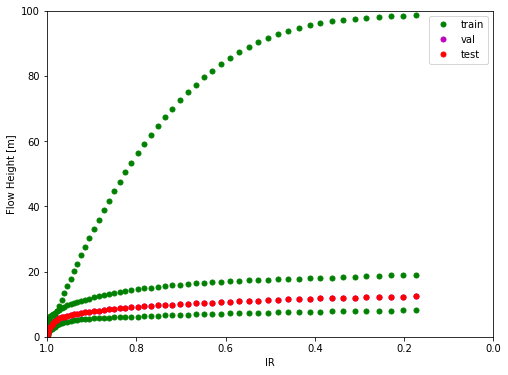

In [127]:
def plot_curve3(trg, valg, teg):
    plt.plot(trg['IR'], trg['FlowHt'], 'go', label='train', markersize=5, zorder=1)
    plt.plot(valg['IR'], valg['FlowHt'], 'mo', label='val',  markersize=5, zorder=1)
    plt.plot(teg['IR'], teg['FlowHt'], 'ro', label='test',  markersize=5, zorder=1)
    plt.xlabel('IR')
    plt.ylabel('Flow Height [m]')
    #plt.xlim([plt.xlim()[1], plt.xlim()[0]])
    plt.xlim(0, 1)
    plt.ylim(0, 100)
    plt.legend(loc='best')
    plt.gca().invert_xaxis()


n = len(df)*0.5
crv_tr0 = df[0:int(n*0.50)].copy()
crv_tr1 = df[int(n*0.75):int(n)].copy()
crv_tr = pd.concat([crv_tr0, crv_tr1])
crv_va = df[int(n*0.50):int(n*0.75)].copy()

plot_curve3(crv_tr, crv_va, crv_va )

In [128]:
'''
tr_loss_con = []
va_loss_con= []
tr_mae_con = []

va_mae_con = []
train_loss = []
val_loss = []
train_mae = []
val_mae = []
'''

'\ntr_loss_con = []\nva_loss_con= []\ntr_mae_con = []\n\nva_mae_con = []\ntrain_loss = []\nval_loss = []\ntrain_mae = []\nval_mae = []\n'

Text(0.5, 1.0, 'train')

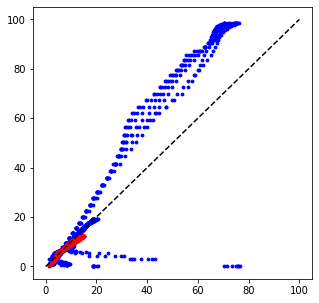

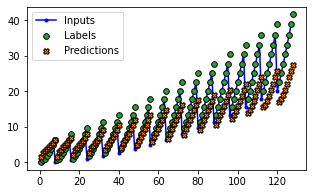

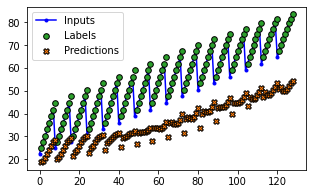

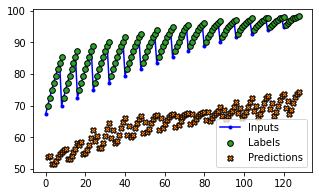

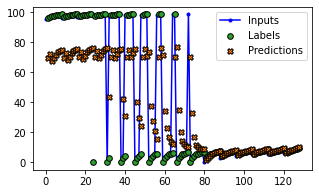

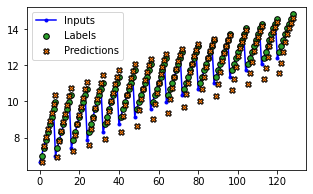

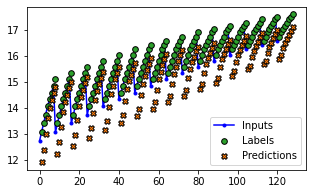

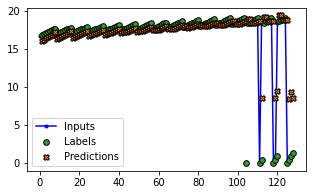

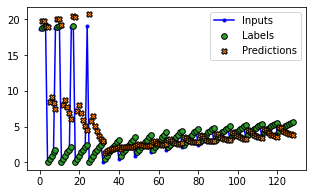

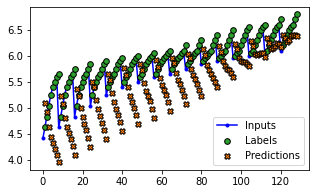

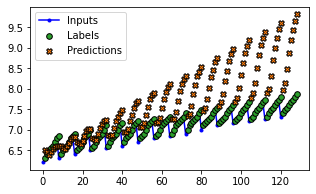

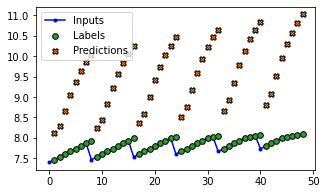

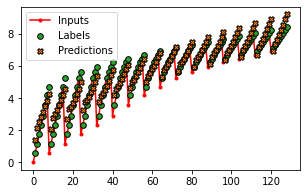

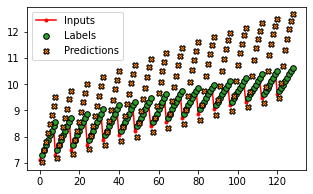

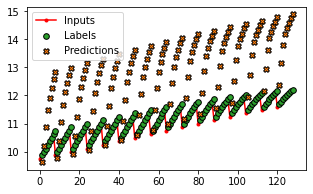

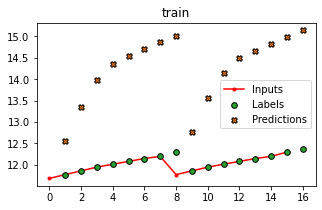

In [129]:

window_t.train_df = crv_tr
window_t.val_df = crv_va

#window_t.plot_batch(model, dset_name='train', n_batch=10 )
input_indices = np.arange(wide_window_t.total_window_size*16-16 )[slice(0, wide_window_t.total_window_size*16 -1, None)]
label_indices = np.arange(wide_window_t.total_window_size*16-15 )[slice(1, None, None)]

#fig, ax5 = plt.subplots(figsize =(5,3))
#ax5.margins(0.01)
fig, ax3 = plt.subplots(figsize =(5,5))

markers = ["X","o", "s", "D", "h"]
colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

data = [window_t.train, window_t.val]
for j, dataset in enumerate(data) :

      for i, batch in enumerate(dataset) :
            fig, ax5 = plt.subplots(figsize =(5,3))
            inputs, labels, lab = batch
            predictions = model(inputs)

            in3 = np.array(inputs, dtype=np.float32)
            #in3 = tf.convert_to_tensor(data, dtype=tf.float32)
            in3 = in3.reshape(8*len(inputs),5)
            in3 = tf.convert_to_tensor(in3, dtype=tf.float32)

            la3 = np.array(labels, dtype=np.float32)
            la3 = la3.reshape(8*len(inputs),1)
            la3 = tf.convert_to_tensor(la3, dtype=tf.float32)

            pr3 = np.array(predictions, dtype=np.float32)
            pr3 = pr3.reshape(8*len(inputs),1)
            pr3 = tf.convert_to_tensor(pr3, dtype=tf.float32)

          #  ax5.scatter(input_indices, inputs[:, :, 1],label='Inputs', marker='.',
            ax5.plot(input_indices[:8*len(inputs)], in3[:,1],label='Inputs', marker='.',
                        color=colors[j], zorder=-10 )
            ax5.scatter(label_indices[:8*len(inputs)], la3[:],label='Labels', marker='o',
                    edgecolors='k', c='#2ca02c', s=32)
            #ax5.scatter(label_indices,   predictions[:, :, 0], label='Predictions',
            ax5.scatter(label_indices[:(8*len(inputs))],   pr3[:], label='Predictions',
                          marker='X',  edgecolors='k', c='#ff7f0e', s=32)
            ax3.scatter(predictions[:, :, 0], labels[:, :, 0],
                        marker='.',color=colors[j], s=32)

            #if i == 0:
            ax5.legend()

            if n_batch is not None :
                    if n_batch <= i :
                        break
                    else:
                        continue
            else :
                continue

ax3.plot([0, 100], [0, 100], 'k--') # dashed diagonal
#ax5.invert_xaxis()


subplot_title = ('train')
plt.gca().set_title(subplot_title)




# Predict Any Curve

#### read Good data

In [130]:
df3 = pd.read_csv(
    #os.path.join(mglearn.datasets.DATA_PATH, "anycurve3.csv") )
    os.path.join(mglearn.datasets.DATA_PATH, "constant(del).csv") )

df3 = df3[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
df3['delIF'] = df3['delFlow']/df3['delIR']*-1

df3['delIF']=df3['delIF'].replace(np.nan, 0)
df3 = df3[['IR', 'FlowHt', 'Sand','Ash', 'delIR' ]]

display(df3.head())

,IR,FlowHt,Sand,Ash,delIR
0,1.0000,0.00,0.4,0.6,0.0000
1,0.9995,0.38,0.4,0.6,-0.0005
2,0.9985,0.96,0.4,0.6,-0.0010
3,0.9970,1.54,0.4,0.6,-0.0015
4,0.9950,2.02,0.4,0.6,-0.0020


,IR,FlowHt,Sand,Ash,delIR
count,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02
mean,-8.805217e-16,-3.062684e-17,-6.916881e-15,1.308340e-15,-9.953724e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.174275e+00,-7.893240e-01,-1.369029e+00,-1.369029e+00,-1.698768e+00
25%,-7.672155e-01,-5.202807e-01,-5.989500e-01,-5.989500e-01,-8.642854e-01
50%,2.786256e-01,-3.790967e-01,-6.855627e-15,1.332268e-15,-1.033895e-15
75%,9.065283e-01,-1.456194e-01,5.989500e-01,5.989500e-01,8.642854e-01
max,1.115497e+00,2.981395e+00,1.369029e+00,1.369029e+00,1.698768e+00


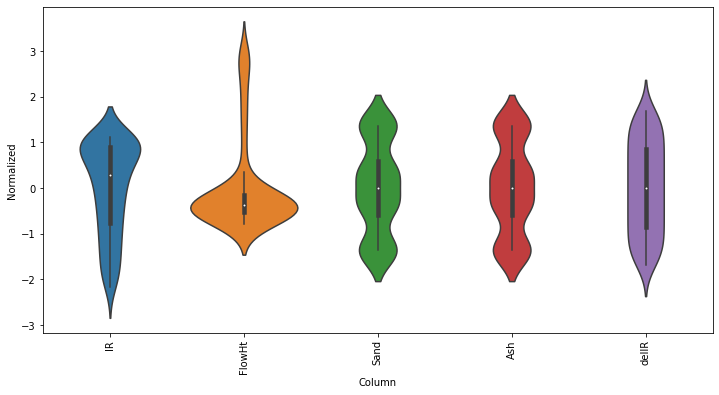

In [131]:
df3_mean = df3.mean()
df3_std = df3.std()
df3_std_s = (df3 - df3_mean) / df3_std
df3_std_m = df3_std_s.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df3_std_m)
_ = ax.set_xticklabels(df3.keys(), rotation=90)
df3_std_s.describe()

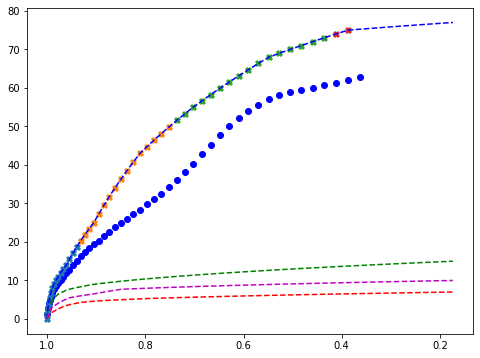

In [132]:
colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

df3_org = df3

n = len(df3)
c_01 = df3[0:int(n*0.25)].copy()
c_11 = df3[int(n*0.25):int(n*0.5)].copy()
c_21 = df3[int(n*0.5):int(n*0.75)].copy()
c_31 = df3[int(n*0.75):int(n)].copy()

fig, ax2 = plt.subplots()
#data_set = [c_01, c_11, c_21, c_31 ]
data_set = [c_31 ]

for j, data in enumerate(data_set) :
    wide_window_t.train_df = data
    ds = wide_window_t.train

    for n, batch in enumerate(ds) :
        inputs, targets, lab = batch
        predictions = lstm_model(inputs)
        ax2.scatter(lab[:,0,0], predictions[:,0,0], marker='o', color=colors[j] )
        ax2.scatter(inputs[:, 0, 0], inputs[:, 0, 1],label='Inputs', marker='X', s=32)

#ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
#        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
 #       curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-',
 #       curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-',)

ax2.plot(c_11.iloc[0:58,0], c_11.iloc[0:58,1], 'g--',
        c_21.iloc[0:58,0], c_21.iloc[0:58,1], 'r--',
        c_31.iloc[0:58,0], c_31.iloc[0:58,1], 'b--',
        c_01.iloc[0:58,0], c_01.iloc[0:58,1], 'm--',)

ax2.invert_xaxis()

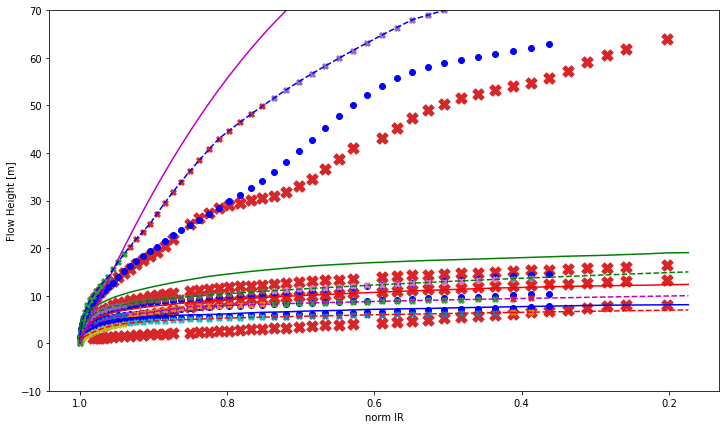

In [133]:
fig, ax2 = plt.subplots(figsize = (12,7))
#------------------------------------------
ax2.set_xlabel('norm IR')
ax2.set_ylabel('Flow Height [m]')
#ax2.set_xlim([1., 0])
ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
         curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-'
          ,curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-')
#------------------------------------------
ax2.plot(c_11.iloc[0:58,0], c_11.iloc[0:58,1], 'g--',
        c_21.iloc[0:58,0], c_21.iloc[0:58,1], 'r--',
        c_31.iloc[0:58,0], c_31.iloc[0:58,1], 'b--',
        c_01.iloc[0:58,0], c_01.iloc[0:58,1], 'm--',)


def split_window( features ):
    inputs = features[:, input_slice, :]
    labels = features[:, labels_slice, :]
    lab = features[:,  labels_slice, 0:2]

    labels = tf.stack( [labels[:, :, 1] ])
    print(f'in split_window : {inputs}')
    print(f'in split_window : {labels}')

    return inputs, labels, lab
def makedata(data) :
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=total_window_size,
      sequence_stride=1,
      shuffle=False, #default
#      shuffle=True,
      batch_size=60,)
    ds = ds.map(split_window )
    return ds

input_width = 8
label_width = 8
shift = 1
total_window_size = input_width + shift
input_slice = slice(0, input_width)
#input_indices = np.arange(self.total_window_size)[self.input_slice]
label_start = total_window_size - label_width
labels_slice = slice(label_start, None)
#label_indices = np.arange(self.total_window_size)[self.labels_slice]

data_set = [c_01, c_11, c_21, c_31 ]
#data_set = [c_31 ]

for j, data in enumerate(data_set) :

    wide_window_t.train_df = data
    ds = wide_window_t.train

#    ds = makedata(data)

    for i, batch in enumerate(ds) :
        inputs, labels, lab = batch
        inputs = inputs.numpy()

        predictions = lstm_model(inputs)
        # for good data, it is OK
        ax2.scatter(lab[:,0,0], predictions[:,0,0], marker='o', color ='b')
        ax2.scatter(inputs[:, 0, 0], inputs[:, 0, 1],label='Inputs', marker='X', s=32)

        if i > 0 :
            #inputs[0,:,1] = inputs_res[-1:,:,1]
            pass
        for n in range (len(inputs)-1) :
        #for n in range (15) :
            #predictions = lstm_model(inputs)
            prediction = lstm_model(inputs[n:n+1])
            #ax2.scatter(lab[n,0, 0],  prediction[0,0,0],marker='X', label='Predictions', c='tab:red', s=128, zorder=-10 )
            ax2.scatter(lab[n, 7 , 0],  prediction[0, 7 ,0],marker='X', label='Predictions', c='tab:red', s=128, zorder=-10 )
            #ax2.scatter(inputs[n, 0 , 0], inputs[n, 0 , 1],label='Inputs', marker='o', s=64,  zorder=-10)

            prediction = prediction.numpy()

            inputs[n+1, 0, 1] = prediction[0, 0, 0]
            #inputs[n+1, :, 1] = predictions[n, :, 0]

        inputs = tf.convert_to_tensor(inputs, dtype=tf.float32)
        inputs_res = inputs

        #predictions = tf.convert_to_tensor(predictions, dtype=tf.float32)
        #predictions = lstm_model(inputs)
#        ax2.scatter(lab[:,:, 0],  predictions[:, :, 0],marker='o', edgecolors=None, label='Predictions'
#             ,facecolors='red'  )# , c='#ff7f0e', s=64)
#        ax2.scatter(inputs[:, :, 0], inputs[:, :, 1],label='Inputs', marker='x')
        #ax2.scatter(lab[:,0, 0],  predictions[:, 0, 0],marker='.', label='Predictions'
        #      , c='tab:red', s=128)
        #ax2.scatter(inputs[:, 0, 0], inputs[:, 0, 1],label='Inputs', marker='X', s=64,  zorder=-10)

ax2.set_ylim([-10, 70])
ax2.invert_xaxis()

#### read Bad data


In [134]:
df4 = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "anycurve3.csv") ) # bad data
    #os.path.join(mglearn.datasets.DATA_PATH, "constant(del).csv") )

df4 = df4[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
df4['delIF'] = df4['delFlow']/df4['delIR']*-1

df4['delIF']=df4['delIF'].replace(np.nan, 0)
df4 = df4[['IR', 'FlowHt', 'Sand','Ash', 'delIR' ]]

display(df4.head())

,IR,FlowHt,Sand,Ash,delIR
0,1.0000,0,0.4,0.6,0.0000
1,0.9995,1,0.4,0.6,-0.0005
2,0.9985,1,0.4,0.6,-0.0010
3,0.9970,1,0.4,0.6,-0.0015
4,0.9950,1,0.4,0.6,-0.0020


,IR,FlowHt,Sand,Ash,delIR
count,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02
mean,-4.287758e-16,2.220446e-16,2.679849e-17,-2.679849e-17,3.062684e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.174275e+00,-7.533546e+00,-1.369029e+00,-1.369029e+00,-1.698768e+00
25%,-7.672155e-01,1.321675e-01,-5.989500e-01,-5.989500e-01,-8.642854e-01
50%,2.786256e-01,1.321675e-01,0.000000e+00,0.000000e+00,1.040834e-16
75%,9.065283e-01,1.321675e-01,5.989500e-01,5.989500e-01,8.642854e-01
max,1.115497e+00,1.321675e-01,1.369029e+00,1.369029e+00,1.698768e+00


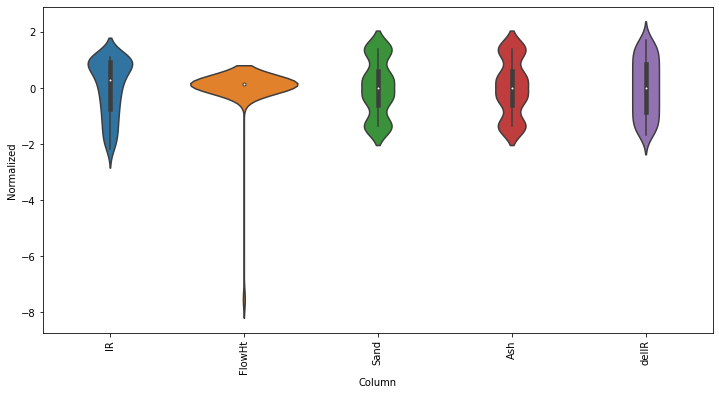

In [135]:
df4_mean = df4.mean()
df4_std = df4.std()
df4_std_s = (df4 - df4_mean) / df4_std
df4_std_m = df4_std_s.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df4_std_m)
_ = ax.set_xticklabels(df4.keys(), rotation=90)
df4_std_s.describe()

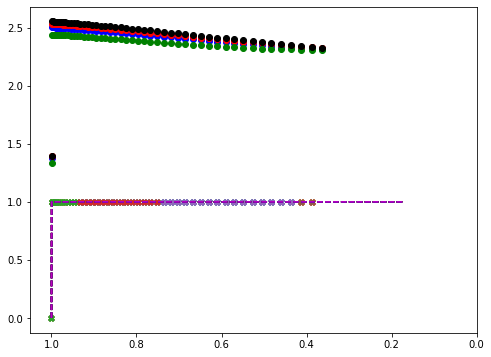

In [136]:
colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

df4_org = df4

n = len(df4)
c_0 = df4[0:int(n*0.25)].copy()
c_1 = df4[int(n*0.25):int(n*0.5)].copy()
c_2 = df4[int(n*0.5):int(n*0.75)].copy()
c_3 = df4[int(n*0.75):int(n)].copy()


fig, ax2 = plt.subplots()

#data_set = [c_0, c_1, c_2, c_3 ]
data_set = [c_0, c_1, c_2, c_3 ]

for j, data in enumerate(data_set) :
    wide_window_t.train_df = data
    ds = wide_window_t.train

    for n, batch in enumerate(ds) :
        inputs, targets, lab = batch
        predictions = lstm_model(inputs)
        ax2.scatter(lab[:,0,0], predictions[:,0,0], marker='o', color=colors[j] )
        ax2.scatter(inputs[:, 0, 0], inputs[:, 0, 1],label='Inputs', marker='X', s=32)

#ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
#        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
 #       curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-',
 #       curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-',)

    ax2.plot(c_1.iloc[0:58,0], c_1.iloc[0:58,1], 'g--',
            c_2.iloc[0:58,0], c_2.iloc[0:58,1], 'r--',
            c_3.iloc[0:58,0], c_3.iloc[0:58,1], 'b--',
            c_0.iloc[0:58,0], c_0.iloc[0:58,1], 'm--',)


    ax2.set_xlim([0, 1.05])

    ax2.invert_xaxis()

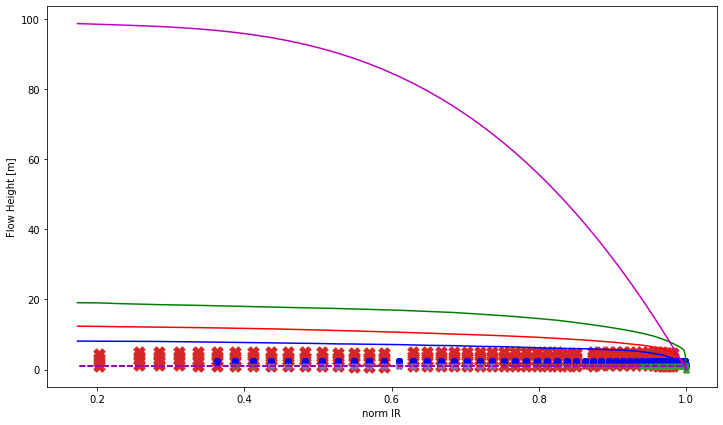

In [137]:
fig, ax2 = plt.subplots(figsize = (12,7))

train_df_3 = curve_3.copy()
train_df_2 = curve_2.copy()
train_df_1 = curve_1.copy()
train_df_0 = curve_0.copy()
#plots_t.plot_all(train_df_0, set_name='0', marker2='o' ,model=conv_model,window_t=conv_window_t, edgecolor2 ='g')
#------------------------------------------
ax2.set_xlabel('norm IR')
ax2.set_ylabel('Flow Height [m]')
#ax2.set_xlim([1., 0])
ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
         curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-'
          ,curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-')
#------------------------------------------
ax2.plot(c_1.iloc[0:58,0], c_1.iloc[0:58,1], 'g--',
        c_2.iloc[0:58,0], c_2.iloc[0:58,1], 'r--',
        c_3.iloc[0:58,0], c_3.iloc[0:58,1], 'b--',
        c_0.iloc[0:58,0], c_0.iloc[0:58,1], 'm--',)


def split_window( features ):
    inputs = features[:, input_slice, :]
    labels = features[:, labels_slice, :]
    lab = features[:,  labels_slice, 0:2]

    labels = tf.stack( [labels[:, :, 1] ])
    print(f'in split_window : {inputs}')
    print(f'in split_window : {labels}')

    return inputs, labels, lab
def makedata(data) :
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=total_window_size,
      sequence_stride=1,
      shuffle=False, #default
#      shuffle=True,
      batch_size=60,)
    ds = ds.map(split_window )
    return ds

input_width = 8
label_width = 8
shift = 1
total_window_size = input_width + shift
input_slice = slice(0, input_width)
#input_indices = np.arange(self.total_window_size)[self.input_slice]
label_start = total_window_size - label_width
labels_slice = slice(label_start, None)
#label_indices = np.arange(self.total_window_size)[self.labels_slice]

#data_set = [c_0, c_1, c_2, c_3 ]
data_set = [c_0, c_1, c_2, c_3 ]


for j, data in enumerate(data_set) :

    wide_window_t.train_df = data
    ds = wide_window_t.train

#    ds = makedata(data)

    for i, batch in enumerate(ds) :
        inputs, labels, lab = batch
        inputs = inputs.numpy()

        predictions = lstm_model(inputs)
        # for good data, it is OK
        ax2.scatter(lab[:,0,0], predictions[:,0,0], marker='o', color ='b')
        ax2.scatter(inputs[:, 0, 0], inputs[:, 0, 1],label='Inputs', marker='X', s=32)

        if i > 0 :
            #inputs[0,:,1] = inputs_res[-1:,:,1]
            pass
        for n in range (len(inputs)-1) :
        #for n in range (15) :
            #predictions = lstm_model(inputs)
            prediction = lstm_model(inputs[n:n+1])
            #ax2.scatter(lab[n,0, 0],  prediction[0,0,0],marker='X', label='Predictions', c='tab:red', s=128, zorder=-10 )
            ax2.scatter(lab[n, 7 , 0],  prediction[0, 7 ,0],marker='X', label='Predictions', c='tab:red', s=128, zorder=-10 )
            #ax2.scatter(inputs[n, 0 , 0], inputs[n, 0 , 1],label='Inputs', marker='o', s=64,  zorder=-10)

            prediction = prediction.numpy()

            inputs[n+1, 0, 1] = prediction[0, 0, 0]
            #inputs[n+1, :, 1] = predictions[n, :, 0]

        inputs = tf.convert_to_tensor(inputs, dtype=tf.float32)
        inputs_res = inputs


#### read Similar data

In [138]:
df5 = pd.read_csv(
    #os.path.join(mglearn.datasets.DATA_PATH, "anycurve3.csv") )
    os.path.join(mglearn.datasets.DATA_PATH, "constant(del)2.csv") ) # input experiment

df5 = df5[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
#df5['delIF'] = df5['delFlow']/df5['delIR']*-1

#df5['delIF']=df5['delIF'].replace(np.nan, 0)
df5 = df5[['IR', 'FlowHt', 'Sand','Ash', 'delIR' ]]

display(df5.head())

,IR,FlowHt,Sand,Ash,delIR
0,1.0000,0.00,0.4,0.6,0.0000
1,0.9995,0.58,0.4,0.6,-0.0005
2,0.9985,1.16,0.4,0.6,-0.0010
3,0.9970,1.74,0.4,0.6,-0.0015
4,0.9950,2.32,0.4,0.6,-0.0020


,IR,FlowHt,Sand,Ash,delIR
count,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02
mean,-4.287758e-16,1.837611e-16,-6.916881e-15,1.308340e-15,4.594026e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.174275e+00,-7.624249e-01,-1.369029e+00,-1.369029e+00,-2.609431e-01
25%,-7.672155e-01,-5.228307e-01,-5.989500e-01,-5.989500e-01,-1.876959e-01
50%,2.786256e-01,-3.942946e-01,-6.855627e-15,1.332268e-15,-1.118327e-01
75%,9.065283e-01,-1.084240e-01,5.989500e-01,5.989500e-01,-3.596959e-02
max,1.115497e+00,2.941465e+00,1.369029e+00,1.369029e+00,8.685676e+00


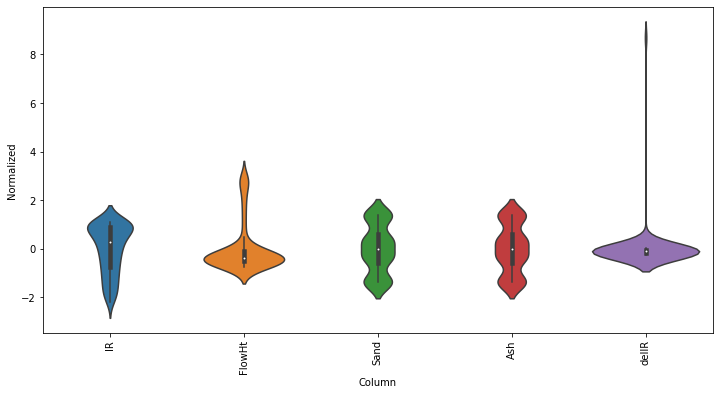

In [139]:
df5_mean = df5.mean()
df5_std = df5.std()
df5_std_s = (df5 - df5_mean) / df5_std
df5_std_m = df5_std_s.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df5_std_m)
_ = ax.set_xticklabels(df5.keys(), rotation=90)
df5_std_s.describe()

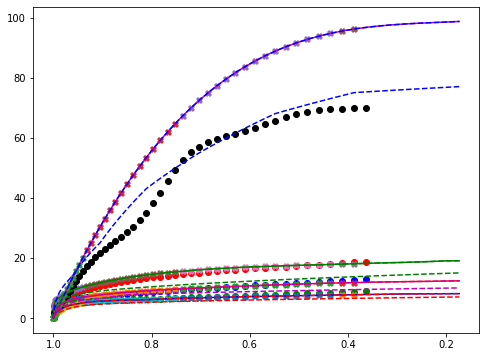

In [140]:
colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

df5_org = df5

n = len(df5)
c_02 = df5[0:int(n*0.25)].copy()
c_12 = df5[int(n*0.25):int(n*0.5)].copy()
c_22 = df5[int(n*0.5):int(n*0.75)].copy()
c_32 = df5[int(n*0.75):int(n)].copy()

fig, ax2 = plt.subplots()
data_set = [c_02, c_12, c_22, c_32 ]
#data_set = [c_31 ]

for j, data in enumerate(data_set) :
    wide_window_t.train_df = data
    ds = wide_window_t.train

    for n, batch in enumerate(ds) :
        inputs, targets, lab = batch
        predictions = lstm_model(inputs)
        ax2.scatter(lab[:,0,0], predictions[:,0,0], marker='o', color=colors[j] )
        ax2.scatter(inputs[:, 0, 0], inputs[:, 0, 1],label='Inputs', marker='X', s=32)

ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
        curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-',
        curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-',)

ax2.plot(c_12.iloc[0:58,0], c_12.iloc[0:58,1], 'g--',
        c_22.iloc[0:58,0], c_22.iloc[0:58,1], 'r--',
        c_32.iloc[0:58,0], c_32.iloc[0:58,1], 'b--',
        c_02.iloc[0:58,0], c_02.iloc[0:58,1], 'm--',)
#------------------------------------------
ax2.plot(c_11.iloc[0:58,0], c_11.iloc[0:58,1], 'g--',
        c_21.iloc[0:58,0], c_21.iloc[0:58,1], 'r--',
        c_31.iloc[0:58,0], c_31.iloc[0:58,1], 'b--',
        c_01.iloc[0:58,0], c_01.iloc[0:58,1], 'm--',)

ax2.invert_xaxis()

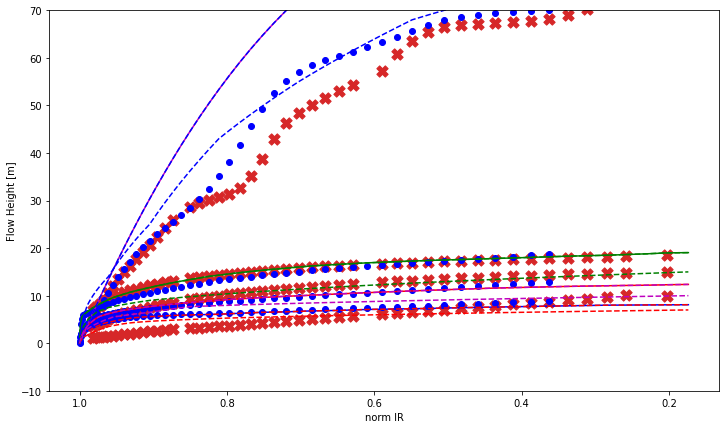

In [141]:
fig, ax2 = plt.subplots(figsize = (12,7))
#------------------------------------------
ax2.set_xlabel('norm IR')
ax2.set_ylabel('Flow Height [m]')
#ax2.set_xlim([1., 0])
ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
         curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-'
          ,curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-')
#------------------------------------------
ax2.plot(c_12.iloc[0:58,0], c_12.iloc[0:58,1], 'g--',
        c_22.iloc[0:58,0], c_22.iloc[0:58,1], 'r--',
        c_32.iloc[0:58,0], c_32.iloc[0:58,1], 'b--',
        c_02.iloc[0:58,0], c_02.iloc[0:58,1], 'm--',)


def split_window( features ):
    inputs = features[:, input_slice, :]
    labels = features[:, labels_slice, :]
    lab = features[:,  labels_slice, 0:2]

    labels = tf.stack( [labels[:, :, 1] ])
    print(f'in split_window : {inputs}')
    print(f'in split_window : {labels}')

    return inputs, labels, lab
def makedata(data) :
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=total_window_size,
      sequence_stride=1,
      shuffle=False, #default
#      shuffle=True,
      batch_size=60,)
    ds = ds.map(split_window )
    return ds

input_width = 8
label_width = 8
shift = 1
total_window_size = input_width + shift
input_slice = slice(0, input_width)
#input_indices = np.arange(self.total_window_size)[self.input_slice]
label_start = total_window_size - label_width
labels_slice = slice(label_start, None)
#label_indices = np.arange(self.total_window_size)[self.labels_slice]

data_set = [c_02, c_12, c_22, c_32 ]
#data_set = [c_31 ]

for j, data in enumerate(data_set) :

    wide_window_t.train_df = data
    ds = wide_window_t.train

#    ds = makedata(data)

    for i, batch in enumerate(ds) :
        inputs, labels, lab = batch
        inputs = inputs.numpy()

        predictions = lstm_model(inputs)
        # for good data, it is OK
        ax2.scatter(lab[:,0,0], predictions[:,0,0], marker='o', color ='b')
        #ax2.scatter(inputs[:, 0, 0], inputs[:, 0, 1],label='Inputs', marker='X', s=32)

        if i > 0 :
            #inputs[0,:,1] = inputs_res[-1:,:,1]
            pass
        for n in range (len(inputs)-1) :
        #for n in range (15) :
            #predictions = lstm_model(inputs)
            prediction = lstm_model(inputs[n:n+1])
            #ax2.scatter(lab[n,0, 0],  prediction[0,0,0],marker='X', label='Predictions', c='tab:red', s=128, zorder=-10 )
            ax2.scatter(lab[n, 7 , 0],  prediction[0, 7 ,0],marker='X', label='Predictions', c='tab:red', s=128, zorder=-10 )
            #ax2.scatter(inputs[n, 0 , 0], inputs[n, 0 , 1],label='Inputs', marker='o', s=64,  zorder=-10)

            prediction = prediction.numpy()

            inputs[n+1, 0, 1] = prediction[0, 0, 0]
            #inputs[n+1, :, 1] = predictions[n, :, 0]

        inputs = tf.convert_to_tensor(inputs, dtype=tf.float32)
        inputs_res = inputs

        #predictions = tf.convert_to_tensor(predictions, dtype=tf.float32)
        #predictions = lstm_model(inputs)
#        ax2.scatter(lab[:,:, 0],  predictions[:, :, 0],marker='o', edgecolors=None, label='Predictions'
#             ,facecolors='red'  )# , c='#ff7f0e', s=64)
#        ax2.scatter(inputs[:, :, 0], inputs[:, :, 1],label='Inputs', marker='x')
        #ax2.scatter(lab[:,0, 0],  predictions[:, 0, 0],marker='.', label='Predictions'
        #      , c='tab:red', s=128)
        #ax2.scatter(inputs[:, 0, 0], inputs[:, 0, 1],label='Inputs', marker='X', s=64,  zorder=-10)

ax2.set_ylim([-10, 70])
ax2.invert_xaxis()

#------------------------------------------
ax2.plot(c_11.iloc[0:58,0], c_11.iloc[0:58,1], 'g--',
        c_21.iloc[0:58,0], c_21.iloc[0:58,1], 'r--',
        c_31.iloc[0:58,0], c_31.iloc[0:58,1], 'b--',
        c_01.iloc[0:58,0], c_01.iloc[0:58,1], 'm--',)
